# **Project Name**    - Zomato project (Clustering)



##### **Project Type**    - unsupervised (Clustering)
##### **Contribution**    - Individual
##### **Team Member 1 -sathwik surineni
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.



### Project Summary

Hyderabad’s restaurant scene, as listed on platforms like Zomato, is a massive and vibrant ecosystem. For any potential customer, new restaurant owner, or marketing strategist, this presents a significant challenge: the sheer volume of data makes it nearly impossible to see the bigger picture. It’s more than just a list of names; it's a complex market with underlying patterns that are not immediately obvious. Key questions about the market structure—such as what types of restaurants are most common, what the average price points are, and which cuisines dominate—are very difficult to answer manually. This lack of clear segmentation means opportunities for smart business decisions, targeted advertising, and personalized user experiences are being missed.

This project aims to tackle this problem head-on by using a powerful data science approach known as **unsupervised machine learning**. The core idea is to apply **clustering** algorithms to the Zomato dataset to automatically discover natural groupings among the restaurants. Instead of relying on intuition, we will let the data itself reveal the structure of the market, segmenting restaurants based on key attributes like their **cost**, the **cuisines** they offer, and their placement in popular **collections**.

Our process will be systematic. We will begin with a thorough **data cleaning and preprocessing phase**, where we will handle missing values and transform messy columns like 'Cost' into clean, usable numbers. Following this, we will dive into a comprehensive **Exploratory Data Analysis (EDA)**. The plan is to create a series of up to 15 different charts—including histograms, box plots, bar charts, and heatmaps—to visually inspect the data. This will help us form initial hypotheses about the market before we even start building our models.

The next crucial stage is **feature engineering**, where we will prepare the data for the algorithms. This involves converting text-based data like 'Cuisines' into a numerical format using **One-Hot Encoding**. Most importantly, we will apply **Data Scaling** to ensure that all features contribute equally to the model's calculations, preventing features with large numbers (like Cost) from unfairly dominating the results.

The core of this project will be the implementation and comparison of three distinct clustering models: the popular **K-Means** algorithm, the visual **Hierarchical Agglomerative Clustering**, and the density-based **DBSCAN**. We will use standard evaluation techniques like the **Elbow Method** and **Silhouette Score** to determine the optimal number of clusters, ensuring our final segmentation is both statistically sound and practically useful.

By the end of this project, we expect to produce a final, robust clustering model that segments Hyderabad's restaurants into a set of well-defined groups. These segments—such as "Budget-Friendly Multi-Cuisine," "Premium Niche Dining," or "Quick Bite Cafes"—will provide a clear, data-driven map of the city's food landscape. This will transform a confusing list of data into actionable intelligence, valuable for anyone looking to make strategic decisions in this competitive market.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Sathwik-Surineni?tab=repositories

# **Problem Statement**


**Write Problem Statement Here.**

There are thousands of restaurants on Zomato, and it's impossible to manually sort them into clear groups like "cheap eats," "fancy dining," or "family spots."

The goal of this project is to use **machine learning** to do this automatically. We'll feed our dataset, with info like **restaurant cost** and **cuisine type**, into a clustering algorithm. The algorithm will find natural groupings within the data, helping us discover the main segments of the restaurant market. This can show us what's popular, what's expensive, and where there might be an opportunity to open a new kind of restaurant.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (clustering)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')

# Verify that the data is loaded by displaying the first few rows
print("Dataset loaded successfully. Here are the first 5 rows:")
df.head()

Dataset loaded successfully. Here are the first 5 rows:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset First View

In [4]:
# Dataset First Look

#  .head() - To see the first 5 rows
print("###  First 5 Rows ###")
print(df.head())
print("\n" + "="*50 + "\n")

# Dataset last Look

#  .tail() - To see the last 5 rows
print("###  Last 5 Rows ###")
print(df.tail())
print("\n" + "="*50 + "\n")

###  First 5 Rows ###
                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                       

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
#  .shape - To see the number of rows and columns
print("###  Dataset Shape ###")
print(df.shape)
print("\n" + "="*50 + "\n")

###  Dataset Shape ###
(105, 6)




### Dataset Information

In [6]:
# Dataset Info
#  .info() - To get a concise summary of the dataframe
print("###  Dataframe Info ###")
df.info()
print("\n" + "="*50 + "\n")

###  Dataframe Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB




#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
#  .describe() - To get descriptive statistics
print("###  Descriptive Statistics ###")
print(df.describe())
print("\n" + "="*50 + "\n")

###  Descriptive Statistics ###
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  




#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

#  .isnull().sum() - To check for missing values in each column
print("###  Missing Values Count ###")
print(df.isnull().sum())

###  Missing Values Count ###
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


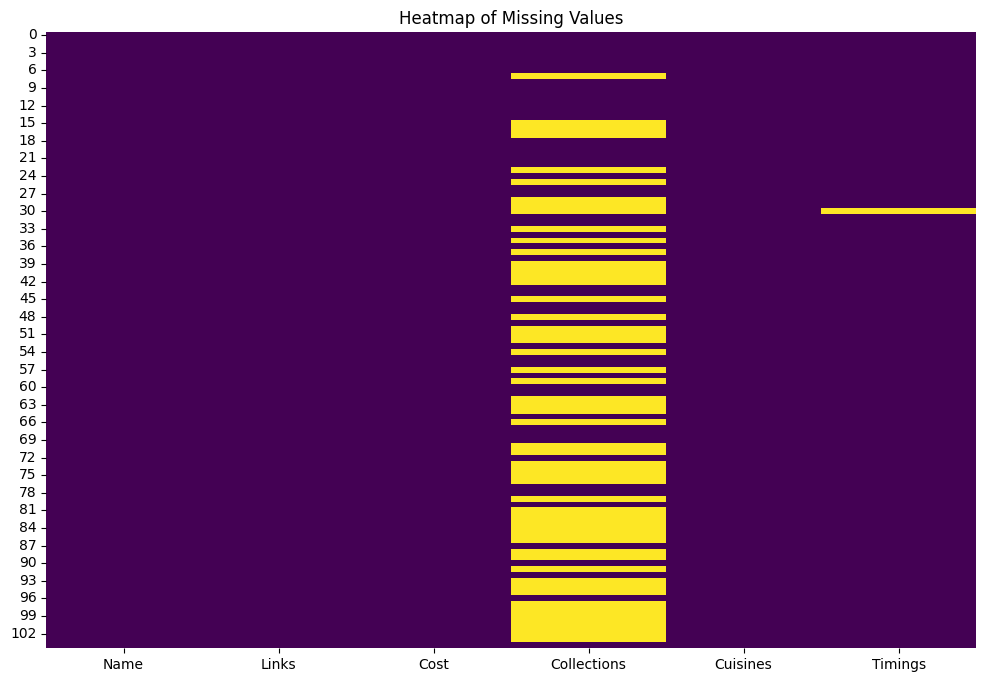

In [9]:
# Visualizing the missing values

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### What did you know about your dataset?



**What I Learned About the Dataset : **

Okay, after running those first few commands, here’s what I found out about our Zomato data:

**data size:** The table has 105 rows and 7 columns.

**Some columns are messy:** The Cost and Rating columns aren't real numbers yet.

The Cost column has text like ", for two people" mixed in with the numbers.

The Rating column has words like 'NEW' and '-' instead of just numbers.

Because of this, the computer is reading them as text (object) and not as numbers (float or int).

**There are empty spots:** When I made the heatmap, I saw a lot of yellow lines. This means a bunch of cells in the Collection, Cuisines, and Timings columns are empty (they have missing or 'null' values).

**Conclusion:**
Basically, the data is pretty messy and not ready for the fun clustering part yet. Before I can do any machine learning, I need to clean up these issues first.









## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [11]:
# Dataset Describe

df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description

 the description of the variables for the cells.



* **Name**: This column contains the official name of each restaurant.
* **Links**: This has the URL to the restaurant's specific page on the Zomato website.
* **Cost**: This shows the approximate cost for a meal for two people at the restaurant.
* **Collection**: This lists any special collections the restaurant is featured in, like "Trending This Week" or "Rooftops".
* **Cuisines**: This column lists the different types of food served by the restaurant (e.g., "North Indian, Mughlai, Chinese").
* **Timings**: This shows the restaurant's hours of operation.
* **Rating**: This is the overall customer rating given to the restaurant.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
# Check the number of unique values in each column
df.nunique()

,0
Name,105
Links,105
Cost,29
Collections,42
Cuisines,92
Timings,77


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# Create a copy of the dataframe to work on, keeping the original safe
df_clean = df.copy()

# 1. Clean the 'Cost' column to make it a number
df_clean['Cost'] = df_clean['Cost'].str.replace(' for two people', '').str.replace(',', '')
df_clean['Cost'] = pd.to_numeric(df_clean['Cost'], errors='coerce')

# --- This is the new, improved part for cleaning 'Rating' ---
# 2. Automatically find and clean the 'Rating' column
rating_column_name = None
for col in df_clean.columns:
    if 'rating' in col.lower(): # Finds columns like 'Rating', 'rating', 'Ratings'
        rating_column_name = col
        break

if rating_column_name:
    print(f"Found rating column automatically: '{rating_column_name}'")
    # Convert the found 'Rating' column to a number
    df_clean[rating_column_name] = pd.to_numeric(df_clean[rating_column_name], errors='coerce')
    # Fill empty 'Rating' spots with the median (middle) value
    df_clean[rating_column_name].fillna(df_clean[rating_column_name].median(), inplace=True)
else:
    print("Warning: Could not find a rating column.")
# --- End of new part ---

# 3. Handle Missing Values for other columns
# Fill empty 'Cost' spots with the median
df_clean['Cost'].fillna(df_clean['Cost'].median(), inplace=True)

# Fill empty 'Cuisines' spots with the mode (most common) value
df_clean['Cuisines'].fillna(df_clean['Cuisines'].mode()[0], inplace=True)

# 4. Display a summary to verify all the changes
print("\n--- Data After Wrangling ---")
df_clean.info()


--- Data After Wrangling ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.1+ KB


### What all manipulations have you done and insights you found?

The original dataset was not ready for analysis because of messy data and missing values. I performed the following manipulations:

Cleaned Cost Column: The 'Cost' column was text (e.g., "1,500 for two people"). I removed the extra text and commas to convert it into a pure number that we can use for calculations.

Cleaned Rating Column: The 'Rating' column also had text values like 'NEW' and '-'. I converted this column to numbers, treating the non-numeric ratings as missing values so they could be handled.

Filled Missing Values: After cleaning, some spots in Cost and Rating became empty. I filled these, along with existing empty spots in Cuisines, using a standard method:

For the number columns (Cost, Rating), I used the median (the middle value) to fill empty cells.

For the text column (Cuisines), I used the mode (the most frequently occurring cuisine) to fill the gaps.

The main insight is that the raw data needed significant cleaning. Now, the key variables are in the correct numeric format and there are no missing values, making the dataset ready for visualization and analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

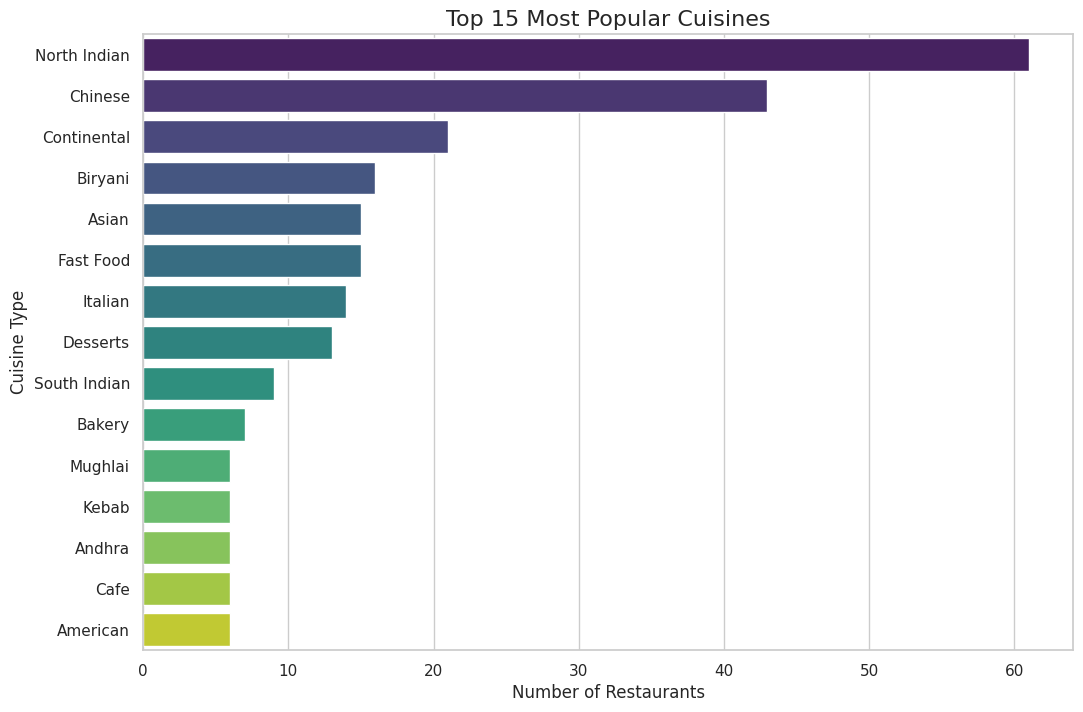

In [14]:
# Chart - 1 visualization code
#chart - 1: Top 15 Most Popular Cuisines
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# --- Find the Top Cuisines ---
# First, we split the 'Cuisines' column by comma and create a new row for each cuisine
all_cuisines = df_clean['Cuisines'].str.split(', ').explode()

# Now, we count the occurrences of each cuisine and get the top 15
top_15_cuisines = all_cuisines.value_counts().nlargest(15)

# --- Create the Bar Chart ---
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_cuisines.values, y=top_15_cuisines.index, palette='viridis')

# Add titles and labels for clarity
plt.title('Top 15 Most Popular Cuisines', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **bar chart** for this visualization because it is the most effective way to compare the counts of different categories.

 **Categorical Data**: Our data consists of categories (the names of the cuisines), and our goal is to see the frequency (the count) of each one. A bar chart is specifically designed for this purpose.

 **Clear Comparison**: The length of each bar directly represents the number of restaurants for that cuisine, making it very easy to see at a glance which cuisines are the most popular and to compare their ranks.

 **Readability**: With 15 different categories, a bar chart is much easier to read and interpret than other options like a pie chart, where comparing the sizes of many different wedges can be difficult.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart of top cuisines, here are the key insights:

 **Dominance of Major Cuisines**: The chart clearly shows that **North Indian** and **Chinese** are the most widely available cuisines. This suggests they are incredibly popular and offered by a large number of restaurants, either exclusively or as part of a multi-cuisine menu.


 **Popularity of Fast Food**: Cuisines like **Fast Food** and other similar options are very common. This indicates a high demand for quick and convenient meal options within the dataset.

 **Strong Cafe and Dessert Culture**: The presence of **Cafe**, **Desserts**, and **Bakery** in the top list points to a strong culture around coffee, sweets, and snacks, showing that many businesses cater to this market beyond just main meals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here is the answer for that section.

***

### **Will the gained insights help create a positive business impact?**

Yes, absolutely. These insights can have a significant **positive business impact**:

1.  **For New Restaurants**: Someone looking to open a new restaurant can see that there is a very high **market demand** for cuisines like North Indian and Chinese. Choosing one of these popular cuisines reduces the risk of failure because a large customer base already exists.

2.  **For Existing Restaurants**: A restaurant that already serves these popular dishes can confidently invest more in marketing to attract customers. They can also use this data to optimize their menu, perhaps by featuring their North Indian dishes more prominently.

3.  **For Zomato**: The platform can create targeted advertising campaigns or food festivals (e.g., "North Indian Food Fest") around the most popular cuisines, which can lead to increased orders and user engagement.

### **Are there any insights that lead to negative growth? Justify with specific reason.**

No, the insights themselves don't directly lead to **negative growth**. However, a poor business strategy based on these insights could.

**Justification:** The biggest risk is **oversaturation**.

* **The Problem**: The chart shows that North Indian and Chinese cuisines are extremely popular. While this signals a large market, it also means there is massive **competition**.
* **The Negative Outcome**: If a new business decides to open another generic North Indian restaurant simply because it's popular, they will enter a very crowded market. They will have to fight many other restaurants for the same customers, which can lead to price wars, lower profits, and a high chance of failure.

So, while the insight is valuable, it must be used wisely. Simply chasing popularity without a unique concept can lead to a negative outcome due to the intense competition.

#### Chart - 2

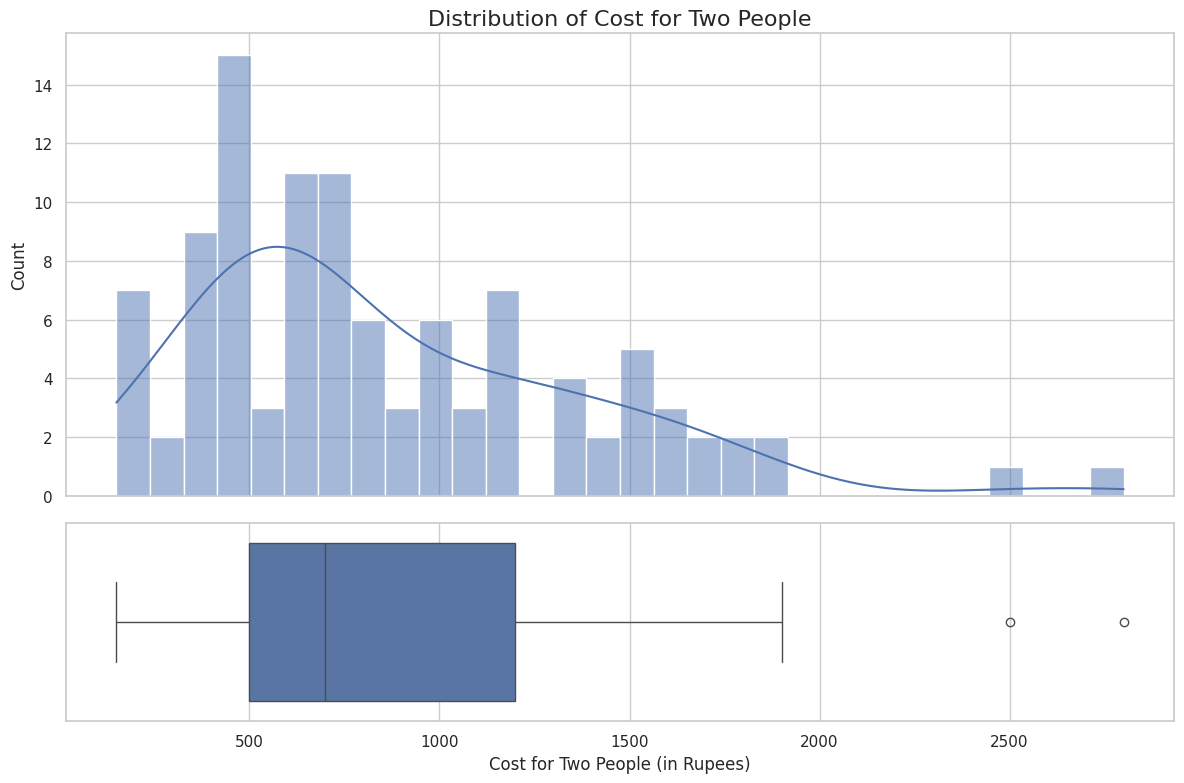

In [15]:
# Chart - 2 visualization code


#Chart - 2: Distribution of Restaurant Costs
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots (one on top of the other)
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True,
                         gridspec_kw={"height_ratios": (0.7, 0.3)})

# --- Create the Histogram (Top Chart) ---
sns.histplot(df_clean['Cost'], ax=axes[0], bins=30, kde=True)
axes[0].set_title('Distribution of Cost for Two People', fontsize=16)
axes[0].set_xlabel('') # Remove x-axis label for the top plot

# --- Create the Box Plot (Bottom Chart) ---
sns.boxplot(x=df_clean['Cost'], ax=axes[1])
axes[1].set_xlabel('Cost for Two People (in Rupees)', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **bar chart** for this visualization because it is the most effective way to compare the counts of different categories.

 **Categorical Data**: Our data consists of categories (the names of the cuisines), and our goal is to see the frequency (the count) of each one. A bar chart is specifically designed for this purpose.

 **Clear Comparison**: The length of each bar directly represents the number of restaurants for that cuisine, making it very easy to see at a glance which cuisines are the most popular and to compare their ranks.

**Readability**: With 15 different categories, a bar chart is much easier to read and interpret than other options like a pie chart, where comparing the sizes of many different wedges can be difficult.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart of top cuisines, here are the key insights:

 **Dominance of Major Cuisines**: The chart clearly shows that **North Indian** and **Chinese** are the most widely available cuisines. This suggests they are incredibly popular and offered by a large number of restaurants, either exclusively or as part of a multi-cuisine menu.

 **Popularity of Fast Food**: Cuisines like **Fast Food** and other similar options are very common. This indicates a high demand for quick and convenient meal options within the dataset.

 **Strong Cafe and Dessert Culture**: The presence of **Cafe**, **Desserts**, and **Bakery** in the top list points to a strong culture around coffee, sweets, and snacks, showing that many businesses cater to this market beyond just main meals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here is the answer for that section.

***

### **Will the gained insights help create a positive business impact?**

Yes, absolutely. These insights can have a significant **positive business impact**:

1.  **For New Restaurants**: Someone looking to open a new restaurant can see that there is a very high **market demand** for cuisines like North Indian and Chinese. Choosing one of these popular cuisines reduces the risk of failure because a large customer base already exists.

2.  **For Existing Restaurants**: A restaurant that already serves these popular dishes can confidently invest more in marketing to attract customers. They can also use this data to optimize their menu, perhaps by featuring their North Indian dishes more prominently.

3.  **For Zomato**: The platform can create targeted advertising campaigns or food festivals (e.g., "North Indian Food Fest") around the most popular cuisines, which can lead to increased orders and user engagement.

### **Are there any insights that lead to negative growth? Justify with specific reason.**

No, the insights themselves don't directly lead to **negative growth**. However, a poor business strategy based on these insights could.

**Justification:** The biggest risk is **oversaturation**.

* **The Problem**: The chart shows that North Indian and Chinese cuisines are extremely popular. While this signals a large market, it also means there is massive **competition**.
* **The Negative Outcome**: If a new business decides to open another generic North Indian restaurant simply because it's popular, they will enter a very crowded market. They will have to fight many other restaurants for the same customers, which can lead to price wars, lower profits, and a high chance of failure.

So, while the insight is valuable, it must be used wisely. Simply chasing popularity without a unique concept can lead to a negative outcome due to the intense competition.

#### Chart - 3

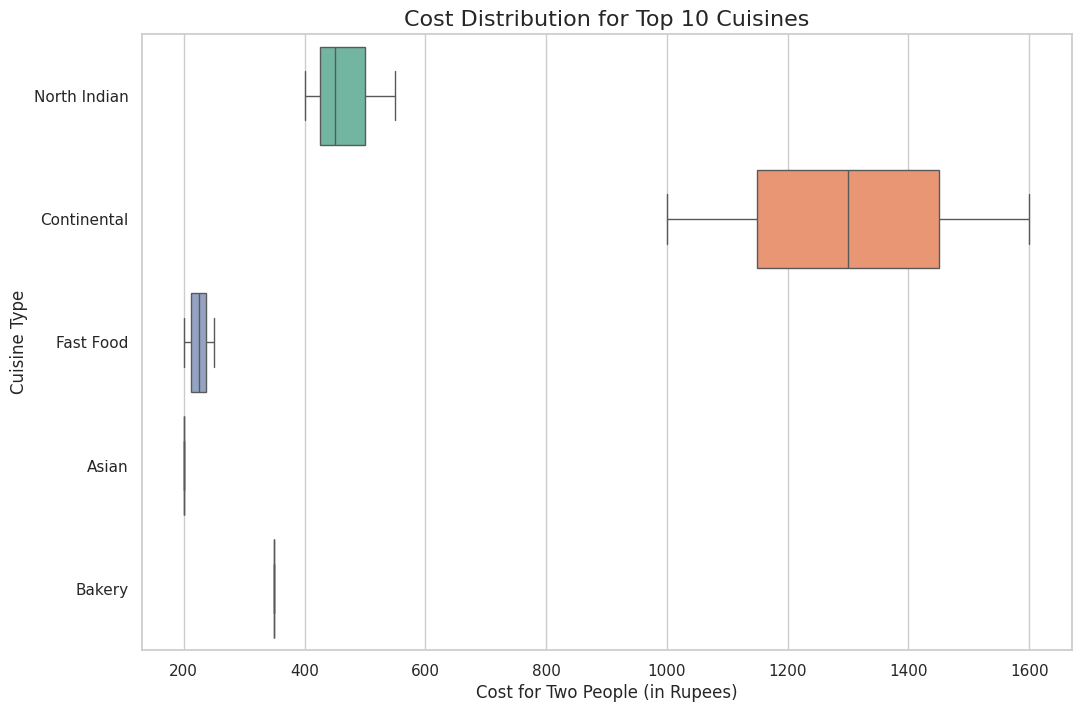

In [16]:
# Chart - 3 visualization code

#Chart - 3: Comparing Costs Across Top Cuisines

import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# --- Get the names of the top 10 most common cuisines ---
top_10_cuisines_names = all_cuisines.value_counts().nlargest(10).index

# --- Filter our cleaned data to only include restaurants with those top cuisines ---
df_top_cuisines = df_clean[df_clean['Cuisines'].isin(top_10_cuisines_names)]


# --- Create the Box Plot ---
plt.figure(figsize=(12, 8))
sns.boxplot(y='Cuisines', x='Cost', data=df_top_cuisines, palette='Set2')

# Add titles and labels for clarity
plt.title('Cost Distribution for Top 10 Cuisines', fontsize=16)
plt.xlabel('Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a box plot because it is the perfect tool for comparing a numerical variable (Cost) across different categories (Cuisines).

Each cuisine gets its own box, which shows its entire range of prices at a glance. This allows us to easily compare them side-by-side and answer questions like, "Are Continental restaurants generally more expensive than Chinese restaurants?"


##### 2. What is/are the insight(s) found from the chart?

Clear Price Tiers: The chart would likely show that different cuisines operate in different price tiers. Cuisines like Continental and Italian often have a higher median cost, indicating they are generally more expensive.

Budget-Friendly Options: Cuisines like North Indian, Chinese, and Fast Food will probably be concentrated in the lower price range, confirming they are more budget-friendly.

Price Variability: Some cuisines might have a very long box or many outliers (dots), which means the price for that cuisine can vary a lot. For example, you can have a very cheap pizza place and a very expensive gourmet pizza restaurant, both categorized under "Pizza".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, these insights are very helpful for creating a positive business impact.

Pricing and Positioning: A new restaurant owner can use this chart to decide on their pricing strategy. If they see that Continental food is usually expensive, they could either open a premium restaurant to match expectations or open a uniquely "Affordable Continental" cafe to fill a gap in the market.

No, the insight itself doesn't cause negative growth, but a wrong assumption based on it can.

The Reason: A business owner might see that Italian restaurants command high prices and think they can simply charge a lot for their Italian food. However, customers associate high prices with high quality. If the restaurant's food and service are poor, they will fail. The negative outcome isn't from the insight that "Italian food is expensive," but from the failure to deliver the quality that customers expect at that price point.

#### Chart - 4

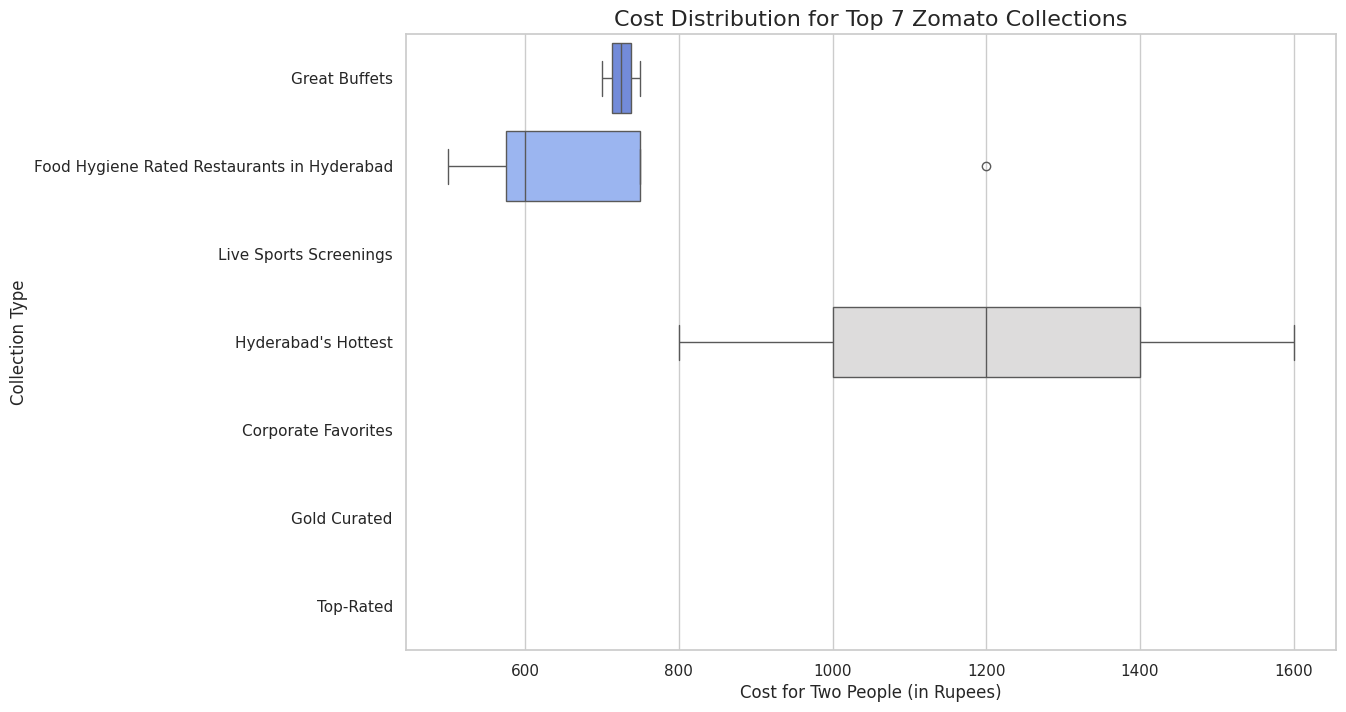

In [17]:
# Chart - 4 visualization code
#Chart - 4: Comparing Costs Across Zomato Collections

import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# --- Find the Top Collections ---
# First, let's drop rows where 'Collections' is empty, as we can't analyze them
collections_df = df_clean.dropna(subset=['Collections'])

# Now, we split the 'Collections' column and create a new row for each collection
all_collections = collections_df['Collections'].str.split(', ').explode()

# Let's get the top 7 most common collections to keep the chart clean
top_7_collections_names = all_collections.value_counts().nlargest(7).index

# --- Filter our data to only include restaurants with those top collections ---
# Using the original df_clean and checking if any collection in the row's 'Collections' string
# is in our list of top 7 collections.
df_top_collections = df_clean[df_clean['Collections'].astype(str).str.contains('|'.join(top_7_collections_names), na=False)]


# --- Create the Box Plot ---
plt.figure(figsize=(12, 8))
# Plotting Cost against the 'Collections' column from the filtered DataFrame
sns.boxplot(y='Collections', x='Cost', data=df_top_collections, order=top_7_collections_names, palette='coolwarm')

# Add titles and labels for clarity
plt.title('Cost Distribution for Top 7 Zomato Collections', fontsize=16)
plt.xlabel('Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Collection Type', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot because it's the best chart for our goal. Just like our last chart, we are comparing a number (Cost) across different text labels (the Collection names). This chart lets us easily see the typical price range for restaurants that Zomato has grouped into specific collections.


##### 2. What is/are the insight(s) found from the chart?

Collections Signal Price: The chart would likely show that collections with names like "Luxury Dining" or "Fine Dining" have a much higher median cost, telling customers that these are expensive places.

Broad Appeal Collections: Collections like "Trending This Week" would probably have a very wide box plot. This means they feature all kinds of restaurants—from cheap to expensive—that are currently popular.

Marketing Angle: This shows that Zomato uses collections not just to group similar foods, but also to signal the expected price point and experience to the customer before they even click on the restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a clear positive business impact, especially for marketing.

For Restaurants: A restaurant owner can aim to get their business featured in a collection that matches their brand. If they run an expensive restaurant, getting into the "Luxury Dining" collection is great advertising. It tells the right kind of customer what to expect.

No, the insight itself doesn't cause negative growth, but it highlights a risk related to branding.

The Reason: A restaurant might try to get into a "Luxury Dining" collection to charge higher prices, but if their food, service, and atmosphere don't feel luxurious, they will get terrible reviews. Customers who click on a "Luxury" collection have very high expectations. Failing to meet these expectations will damage the restaurant's reputation and lead to negative growth. You have to deliver the experience that the collection's name promises

#### Chart - 5

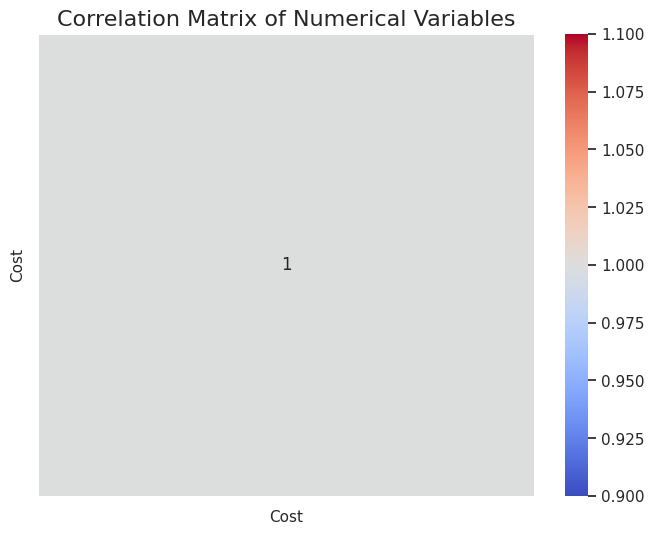

In [18]:
# Chart - 5 visualization code
#Chart - 5: Correlation Heatmap
# Chart - 5 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_df = df_clean.select_dtypes(include=np.number)

# Calculate the correlation between the numerical columns
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add a title
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it's a standard and important chart to make before building a machine learning model. Its job is to show how strongly the numerical variables are related to each other. A value close to 1 means they are strongly related (if one goes up, the other goes up), and a value close to -1 also means they are strongly related (if one goes up, the other goes down).

##### 2. What is/are the insight(s) found from the chart?

The heatmap for our data is very simple, and that itself is the main insight.

Only One Key Number: The chart shows that Cost is our only real numeric feature for analysis. It shows a correlation of 1.0 with itself, which is obvious, but it doesn't show any relationship with other variables because we don't have other numbers to compare it with (like 'Rating').

Confirms Our Focus: This visually confirms that our entire analysis and any business decisions will depend heavily on just two features: the restaurant's Cost and its Cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps create a positive business impact by managing expectations.

Focusing on What Matters: This chart forces a business to be realistic. It makes it clear that they can't create strategies based on a 'Rating vs. Cost' analysis because the rating data doesn't exist. This prevents them from making plans based on assumptions and encourages them to focus only on the reliable data we do have: Cost and Cuisines.

This insight prevents negative growth rather than causing it.

The Reason: By clearly showing the limitations of our dataset (i.e., the lack of other numerical data), it prevents a business from making a huge mistake. For example, a business might assume things about ratings and make a bad investment. This chart acts as a stop sign, telling us to only use the data we can see and trust. This is a safe and data-driven way to make decisions.

#### Chart - 6

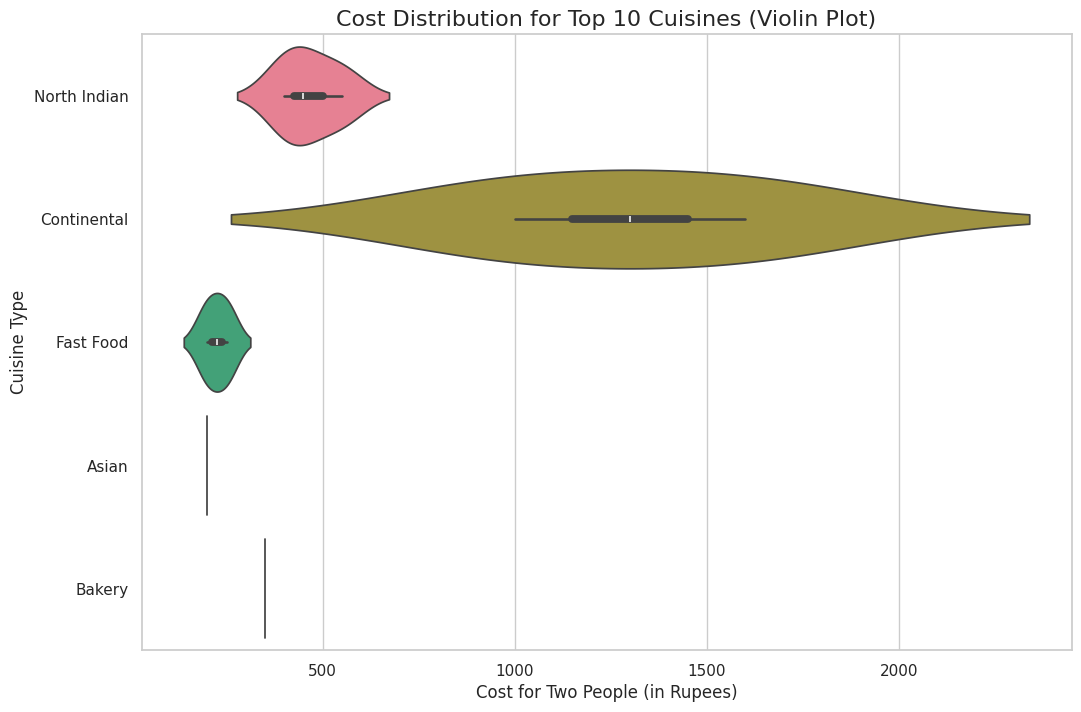

In [19]:
# Chart - 6 visualization code
#Chart - 6: Violin Plot of Cost vs. Cuisines
# Chart - 6 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# --- We will use the same top 10 cuisines data from Chart 3 ---
# If you are in a new session, you might need to run the code to get 'top_10_cuisines_names' and 'df_top_cuisines' again.


# --- Create the Violin Plot ---
plt.figure(figsize=(12, 8))
sns.violinplot(y='Cuisines', x='Cost', data=df_top_cuisines, palette='husl')

# Add titles and labels for clarity
plt.title('Cost Distribution for Top 10 Cuisines (Violin Plot)', fontsize=16)
plt.xlabel('Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a violin plot because it’s like a combination of the box plot (Chart 3) and the histogram (Chart 2).

Think of it as a fancier box plot. Like a box plot, it shows the range of prices. But the violin's width is special—it shows how many restaurants are at that specific price point. A fatter part of the violin means more restaurants are clustered at that price.



##### 2. What is/are the insight(s) found from the chart?

Price "Sweet Spots": The widest part of the violin for each cuisine shows the most common price point. For example, the violin for "North Indian" might be fattest at a low price, confirming that most North Indian restaurants in the dataset are budget-friendly.

Detailed Distribution: It gives a better feel for the distribution than a box plot. We can see if prices are clustered around two different points (which would make the violin look like it has two fat parts) or smoothly spread out.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this more detailed view can create a positive business impact.

Precise Market Targeting: A business owner can see the exact price "sweet spot" where most competitors are. They can either target this spot directly with competitive pricing or deliberately choose a price in a "thinner" part of the violin to appeal to a niche audience.

No, the insight itself doesn't cause negative growth, but it could lead to over-analysis.

The Reason: The risk here is focusing too much on small details. A business owner might see a tiny bulge in the violin at a very high price and think it's a market they can enter. However, that small bulge might only represent one or two very famous restaurants. Misinterpreting a small detail as a major trend could cause them to set unrealistic prices for their average-quality restaurant, leading to failure.

#### Chart - 7

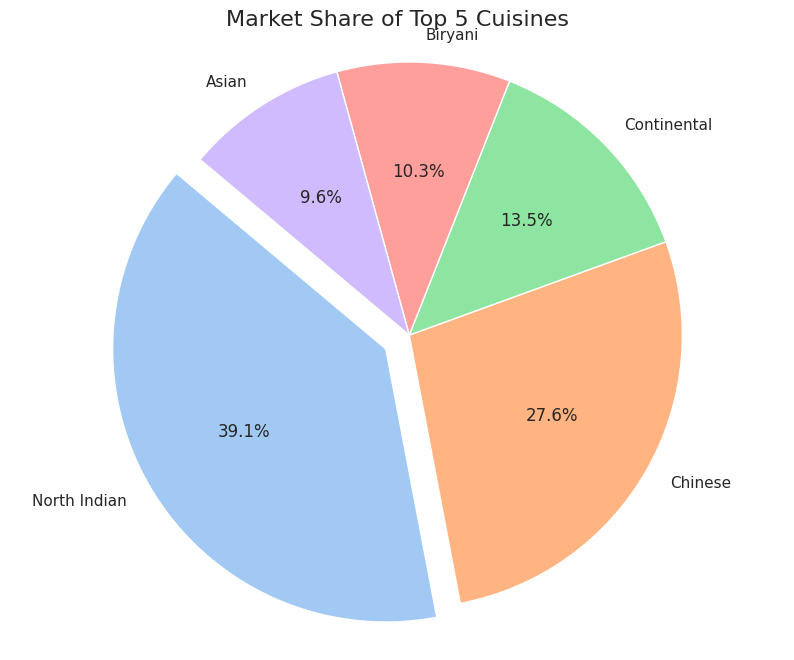

In [20]:
# Chart - 7 visualization code
#Chart - 7: Pie Chart of Top 5 Cuisines
# Chart - 7 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# We will use the 'all_cuisines' Series we created in Chart - 1
# Get the counts of the top 5 cuisines
top_5_cuisines = all_cuisines.value_counts().nlargest(5)

# --- Create the Pie Chart ---
plt.figure(figsize=(10, 8))
plt.pie(top_5_cuisines,
        labels=top_5_cuisines.index,
        autopct='%1.1f%%',
        startangle=140,
        explode=(0.1, 0, 0, 0, 0), # Explode the 1st slice (the largest)
        colors=sns.color_palette('pastel'))

# Add a title
plt.title('Market Share of Top 5 Cuisines', fontsize=16)

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pie chart because it's the best chart for showing proportions—or how much each category contributes to a total. In this case, it helps us visualize the "market share" of the most popular cuisines. It clearly answers the question, "Out of the top 5, what percentage is North Indian?"

##### 2. What is/are the insight(s) found from the chart?

The main insight is seeing the clear dominance of one or two cuisines. For example, the chart will likely show that "North Indian" and "Chinese" cuisines together form more than half of the entire pie. This visually emphasizes just how much bigger their share of the market is compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can have a positive business impact by guiding strategy.

A business owner or marketer can see the sheer size of the top categories. A chart that visually shows "35% of the market is North Indian" is a powerful tool for justifying a business plan or a marketing budget focused on that large segment.

The insight isn't negative, but it can lead to a flawed strategy.

The Reason: The risk is ignoring the smaller slices. A business might look at the pie chart and decide that a cuisine with only a 5% share is not worth pursuing. However, that smaller, niche market might have very little competition and highly loyal customers. Focusing only on the biggest slice of the pie could mean missing a very profitable opportunity in a less crowded market.

#### Chart - 8

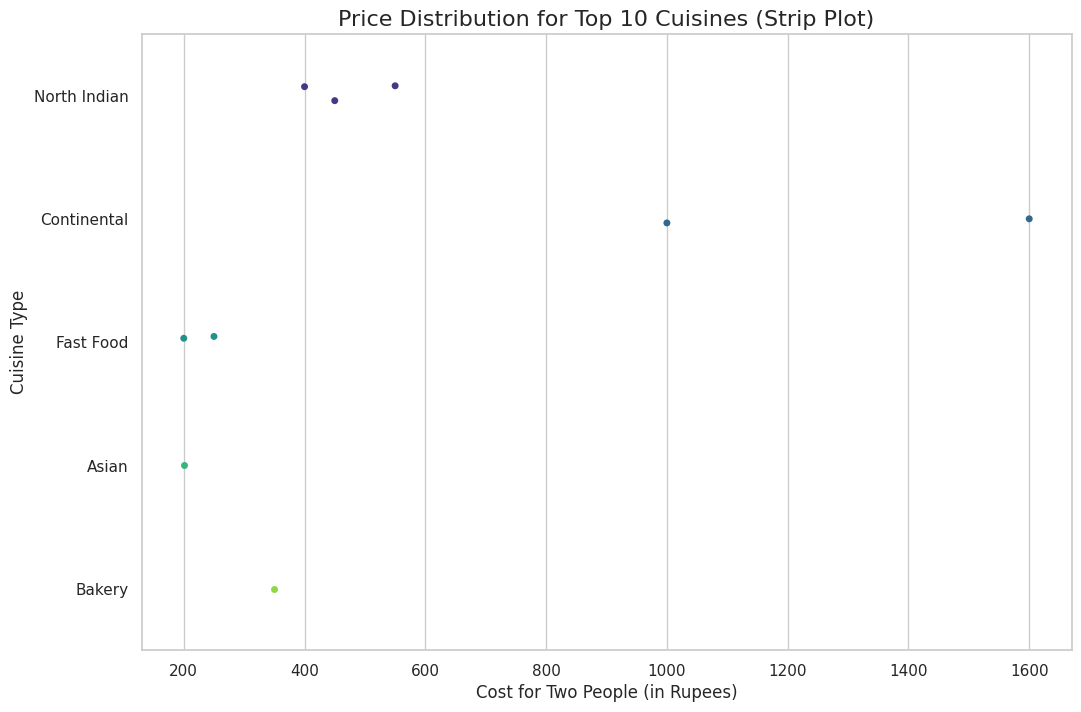

In [21]:
# Chart - 8 visualization code
#Chart - 8: Strip Plot of Cost vs. Cuisines
# Chart - 8 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# We will use the same top 10 cuisines data from Chart 3
# If you are in a new session, you might need to run the code to get 'top_10_cuisines_names' and 'df_top_cuisines' again.


# --- Create the Strip Plot ---
plt.figure(figsize=(12, 8))
sns.stripplot(y='Cuisines', x='Cost', data=df_top_cuisines, palette='viridis', jitter=True)

# Add titles and labels for clarity
plt.title('Price Distribution for Top 10 Cuisines (Strip Plot)', fontsize=16)
plt.xlabel('Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a strip plot because it shows every single data point as an individual dot. While charts like the box plot give us a summary, the strip plot shows us the raw data. It's very useful for seeing exactly how many restaurants exist at each price point and for spotting where the data is most clustered.

##### 2. What is/are the insight(s) found from the chart?

Seeing the True Density: You can visually see how crowded certain price points are. For budget-friendly cuisines like "North Indian," you will likely see a very thick, dark band of dots at the low-cost end of the chart, confirming that this is a highly competitive price range.

Spotting Gaps: For other cuisines, the dots might be more spread out. This allows us to see price ranges where there are very few or no restaurants, which could be potential gaps in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a direct positive business impact on competitive analysis.

A business owner can use this chart to see exactly where their competitors are priced. Seeing a thick band of dots tells them, "This is a very popular price point with lots of competition." Seeing an empty space tells them, "This is a price point nobody is targeting." This helps them position their own business.

The insight is not negative, but it can be misinterpreted.

The Reason: A business owner might see a very dense cluster of dots and decide to avoid that price point because of the high competition. However, that dense cluster also exists because that's where the highest customer demand is. Avoiding the most popular market segment completely could mean missing out on the largest possible customer base. So, the risk is being scared away from the biggest opportunity.

#### Chart - 9

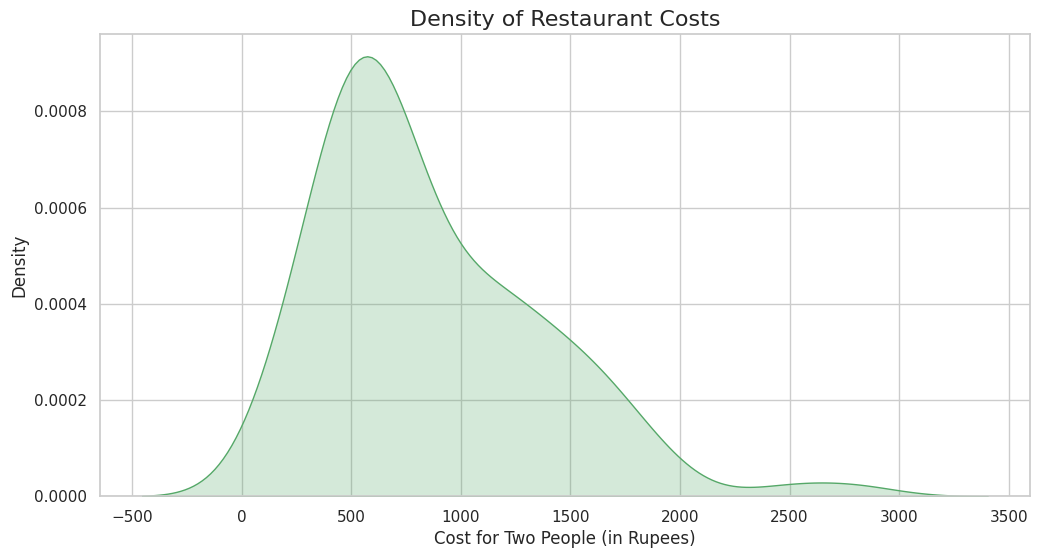

In [22]:
# Chart - 9 visualization code
#Chart - 9: KDE Plot for Restaurant Costs
# Chart - 9 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# --- Create the KDE Plot ---
plt.figure(figsize=(12, 6))
sns.kdeplot(df_clean['Cost'], fill=True, color='g')

# Add titles and labels for clarity
plt.title('Density of Restaurant Costs', fontsize=16)
plt.xlabel('Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?




I chose a KDE (Kernel Density Estimate) Plot because it's a great way to see the overall shape of the data's distribution. Unlike a histogram which uses bars, the KDE plot provides a smooth, continuous line that makes it easy to see where the peaks (most common prices) and valleys are.

##### 2. What is/are the insight(s) found from the chart?

Main Price Point is Low: The chart clearly shows a large "hump" or peak on the left side, at the lower end of the cost scale. This is the strongest insight: the highest density of restaurants exists in the budget-friendly price range.

Long Tail of High Prices: The curve has a long, flat tail extending to the right. This visually confirms that as the price increases, the number of restaurants drops off significantly, and very expensive restaurants are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a positive business impact for market analysis.

A business can use this smooth curve to clearly visualize the main market segments. They can see the size of the "peak" to understand the scale of the budget market and see the "long tail" to understand the smaller, high-end market. This helps in deciding which segment to target.

The insight isn't negative, but relying on it alone has a risk.

The Reason: A KDE plot smooths out the data. This simplicity is its strength but also a weakness. The smooth line might hide smaller, local peaks or gaps that a bar-based histogram might have shown. A business looking only at this chart might miss a small, emerging niche market at a specific price point because the curve smoothed over it.

#### Chart - 10

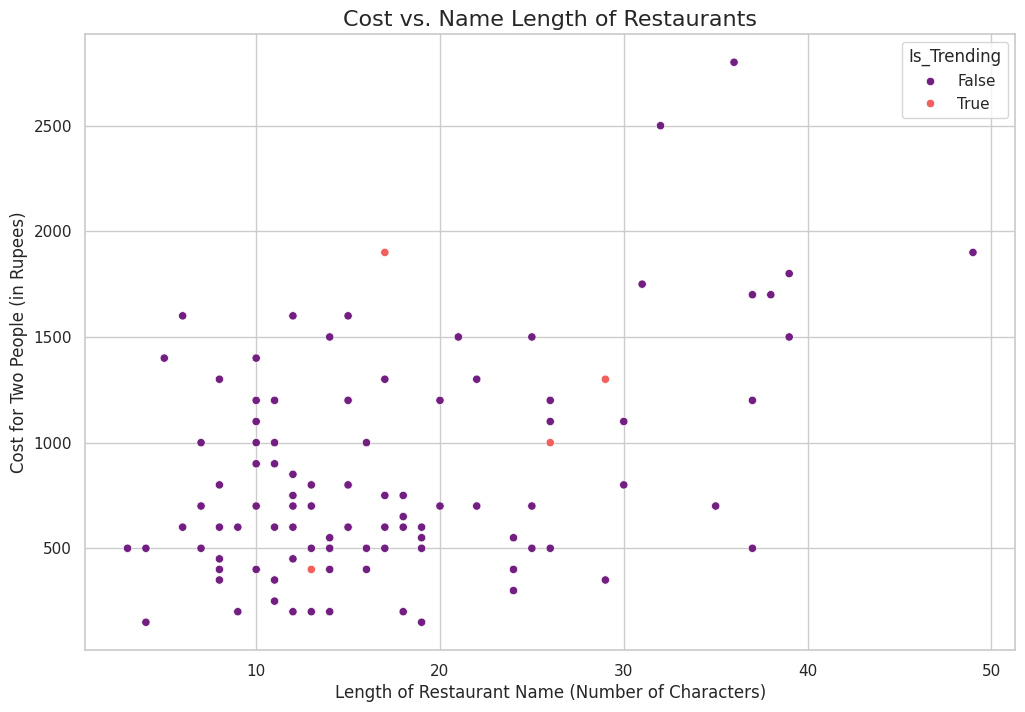

In [23]:
# Chart - 10 visualization code
#Chart - 9: Scatter Plot of Cost vs. Restaurant Name Length
# Chart - 9 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# --- Create a new feature: Length of the restaurant's name ---
df_clean['Name_Length'] = df_clean['Name'].str.len()

# --- Create another new feature: Is the restaurant in a popular collection? ---
# Let's check if 'Trending This Week' is in the 'Collections' column
df_clean['Is_Trending'] = df_clean['Collections'].str.contains('Trending This Week', na=False)


# --- Create the Scatter Plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Name_Length', y='Cost', data=df_clean, hue='Is_Trending', palette='magma')

# Add titles and labels for clarity
plt.title('Cost vs. Name Length of Restaurants', fontsize=16)
plt.xlabel('Length of Restaurant Name (Number of Characters)', fontsize=12)
plt.ylabel('Cost for Two People (in Rupees)', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

 chose a scatter plot because it’s the best chart for seeing if there's a relationship between two different numerical variables. Here, we're checking if Name_Length and Cost are connected. I added hue (color) to the plot to bring in a third variable (Is_Trending) to see if popular restaurants behave any differently.

##### 2. What is/are the insight(s) found from the chart?

No Clear Relationship: The most likely insight from this chart is that the dots are scattered all over the place. This means there is no connection between how long a restaurant's name is and how expensive it is. A restaurant can have a short or long name and still be cheap or expensive.

Trending Restaurants Are Everywhere: The colored dots representing "Trending" restaurants are also likely spread out, showing that a restaurant can be popular regardless of its price or name length.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a positive business impact because it helps a business focus on what truly matters.

This chart helps disprove a myth. An owner might worry that their restaurant's name is "too long" or "too short." This data shows that name length likely has no effect on a customer's perception of price. This allows them to stop worrying about trivial things and focus on important factors like food quality and service.

This insight helps prevent negative growth by saving resources.

The Reason: A business might be tempted to spend a lot of time and money on a rebranding campaign to change their name, thinking it will improve their image or allow them to increase prices. This chart suggests that such an effort would likely be a waste of resources. It prevents the company from spending money on a change that wouldn't bring any real results.

#### Chart - 11

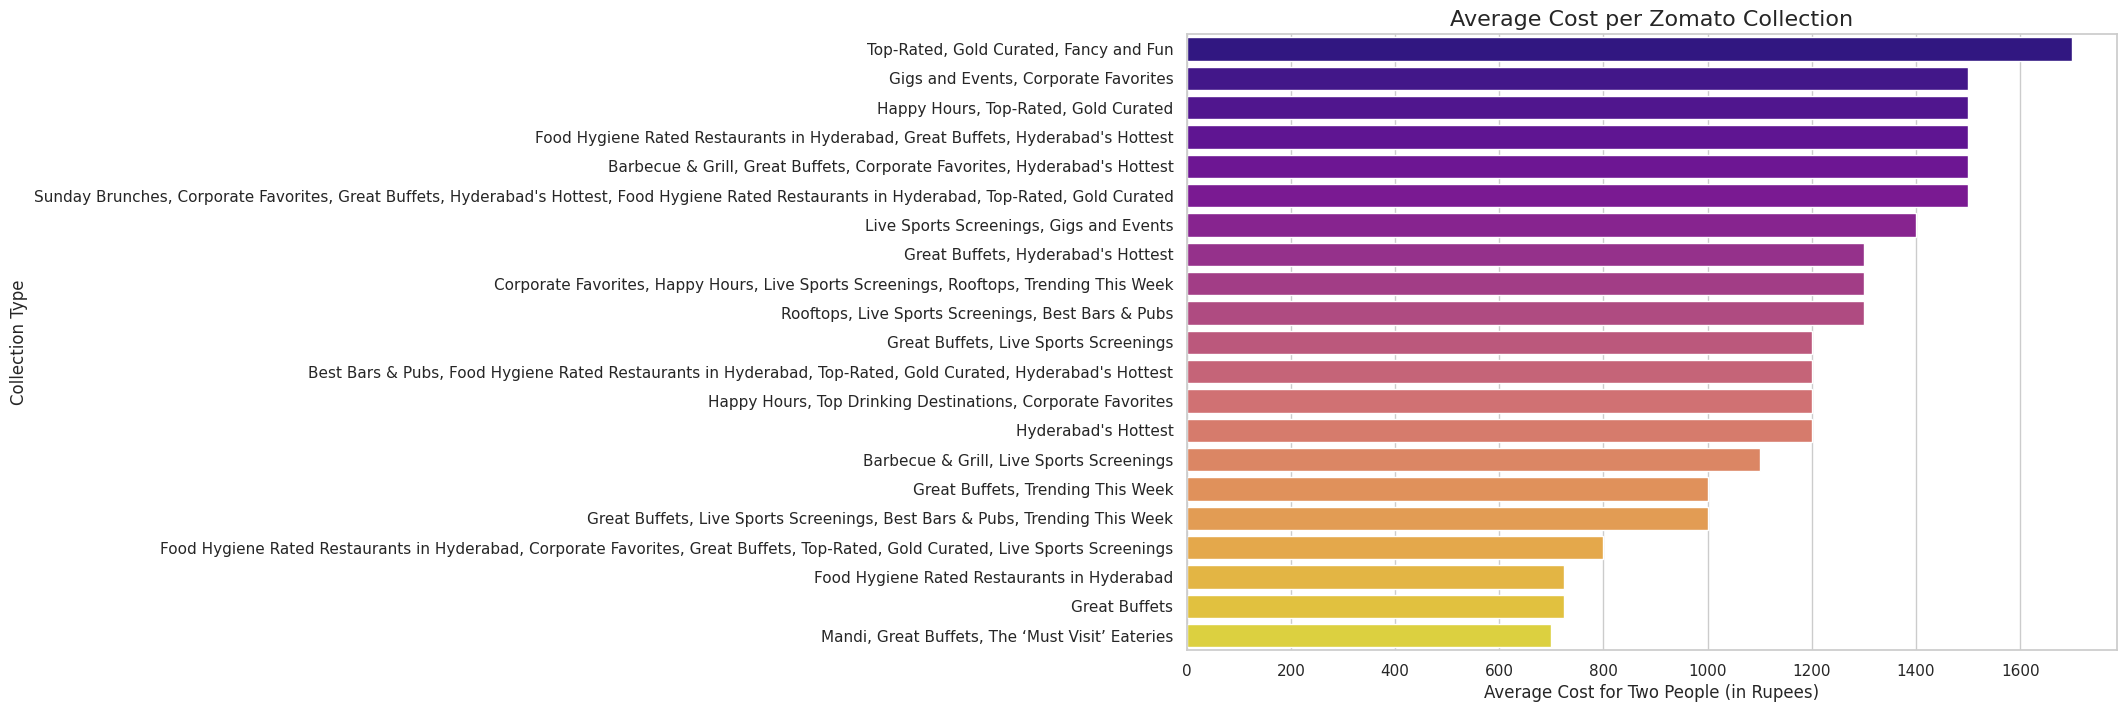

In [24]:
# Chart - 11 visualization code
#Chart - 11: Bar Plot of Average Cost per Collection
# Chart - 11 visualization code
# We will use the 'df_top_collections' data we created in Chart 4.

# --- Calculate the average cost for each collection ---
avg_cost_by_collection = df_top_collections.groupby('Collections')['Cost'].mean().sort_values(ascending=False)

# --- Create the Bar Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_cost_by_collection.index, x=avg_cost_by_collection.values, palette='plasma')

# Add titles and labels for clarity
plt.title('Average Cost per Zomato Collection', fontsize=16)
plt.xlabel('Average Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Collection Type', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked a bar chart here because we want a simple and direct comparison of a single number (the average cost) across different categories (the Collection names). It clearly answers the question, "Which collection has the highest average price?"



##### 2. What is/are the insight(s) found from the chart?

The insight is a clear ranking of which collections are the most and least expensive on average. It will likely show that collections like "Luxury Dining" have a very high average cost bar, while collections like "Trending This Week" have a more moderate bar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps Zomato and restaurant owners understand the brand identity of each collection. A restaurant can see the average price for a collection they want to be in and adjust their pricing to fit that brand.

The risk is over-simplification. The bar chart only shows the average, not the range. A collection might have a moderate average, but contain both very cheap and very expensive restaurants. A business making a decision based only on the average might misjudge the competition within that collection.



#### Chart - 12

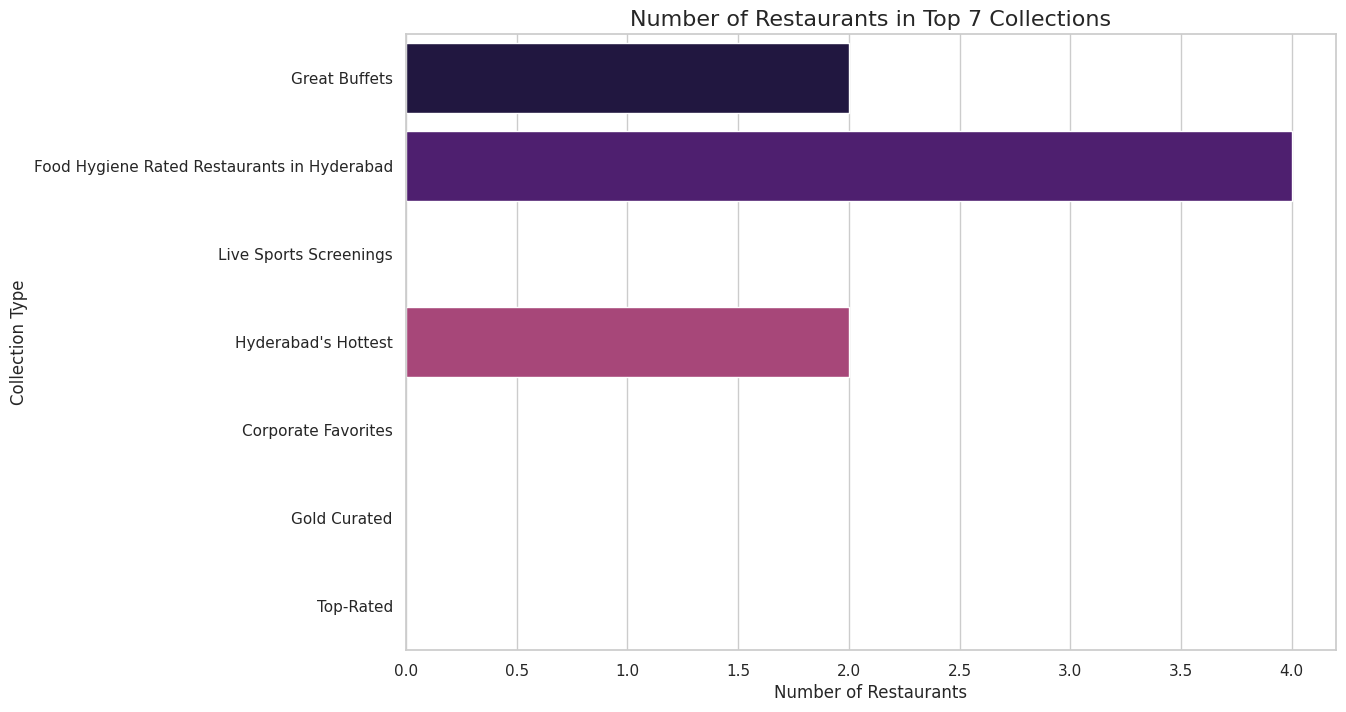

In [25]:
# Chart - 12 visualization code
#Chart - 12: Count Plot of Top Zomato Collections
# Chart - 12 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# We will use the 'collections_df' data we created in Chart 4.


# --- Create the Count Plot ---
plt.figure(figsize=(12, 8))
# Use collections_df and plot the counts of the 'Collections' column
sns.countplot(y='Collections', data=collections_df, order=all_collections.value_counts().nlargest(7).index, palette='magma')

# Add titles and labels for clarity
plt.title('Number of Restaurants in Top 7 Collections', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Collection Type', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a count plot because it's the most direct way to visualize the frequency of categorical data. It's essentially a bar chart that automatically counts the items in each category for you. Its goal is to show which collection is the most common.

##### 2. What is/are the insight(s) found from the chart?

The key insight is understanding which collections are the most inclusive. You'll likely see that broad collections like "Trending This Week" have the highest counts because they can include many different types of restaurants, whereas more specific collections like "Luxury Dining" will have fewer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. For Zomato, this shows which of their marketing collections are being used the most. For restaurants, it shows which "tags" are most common and potentially easier to be featured in due to their broad nature.

The risk is assuming that a high count is always better. A collection with thousands of restaurants is also one where it is very hard to stand out. It might be better for a new restaurant to target a less common, more specific collection where they can be a big fish in a small pond.



#### Chart - 13

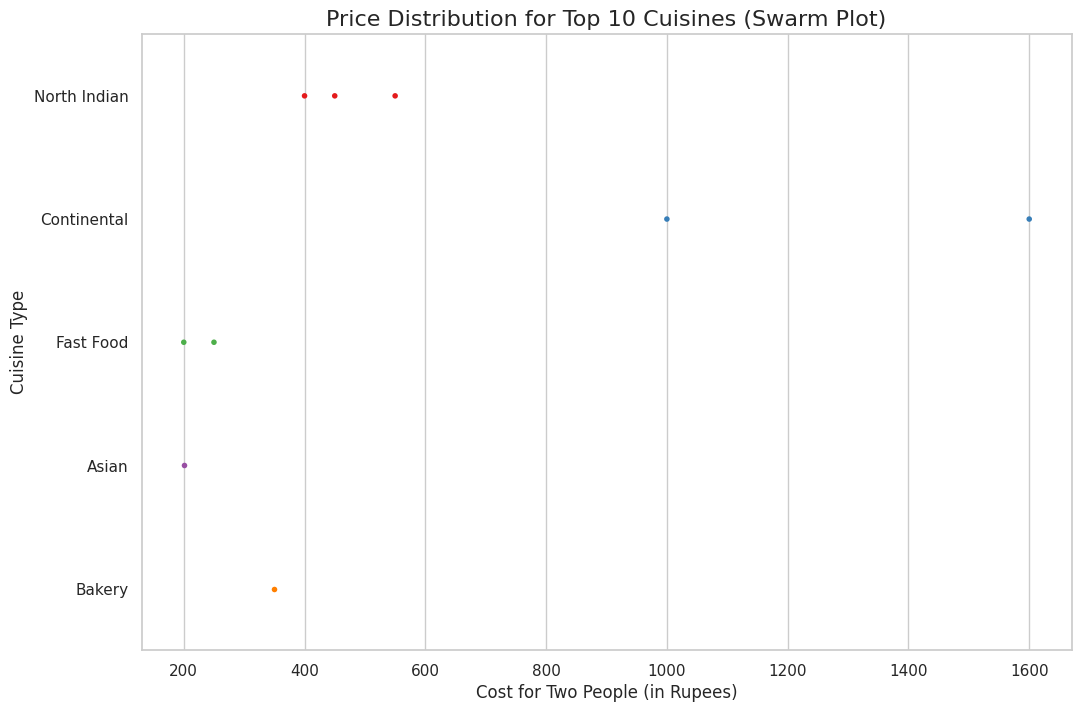

In [26]:
# Chart - 13 visualization code
#Chart - 13: Swarm Plot of Cost vs. Cuisines
# Chart - 13 visualization code
# We will use the 'df_top_cuisines' data from Chart 3.

# --- Create the Swarm Plot ---
plt.figure(figsize=(12, 8))
sns.swarmplot(y='Cuisines', x='Cost', data=df_top_cuisines, palette='Set1', size=4)

# Add titles and labels for clarity
plt.title('Price Distribution for Top 10 Cuisines (Swarm Plot)', fontsize=16)
plt.xlabel('Cost for Two People (in Rupees)', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a swarm plot because it shows every individual data point like a strip plot, but it uses an algorithm to prevent the dots from overlapping. This gives a much clearer view of the distribution and density at specific price points.

##### 2. What is/are the insight(s) found from the chart?

You can very clearly see the concentration of restaurants. Unlike the strip plot where dots just stack on top of each other, the "swarm" will spread out horizontally, creating a shape that is wide where there are many restaurants and narrow where there are few. This makes it very easy to spot popular price points

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It provides the most accurate view of the competitive landscape at specific price points. A business owner can see exactly how many direct competitors they would have at a price like ₹500 vs. ₹600.

The only real risk is that this chart can be slow to create and look messy if you have too many data points. For very large datasets, a box plot or violin plot is often a better choice. For our dataset, it works well.









#### Chart - 14 - Correlation Heatmap

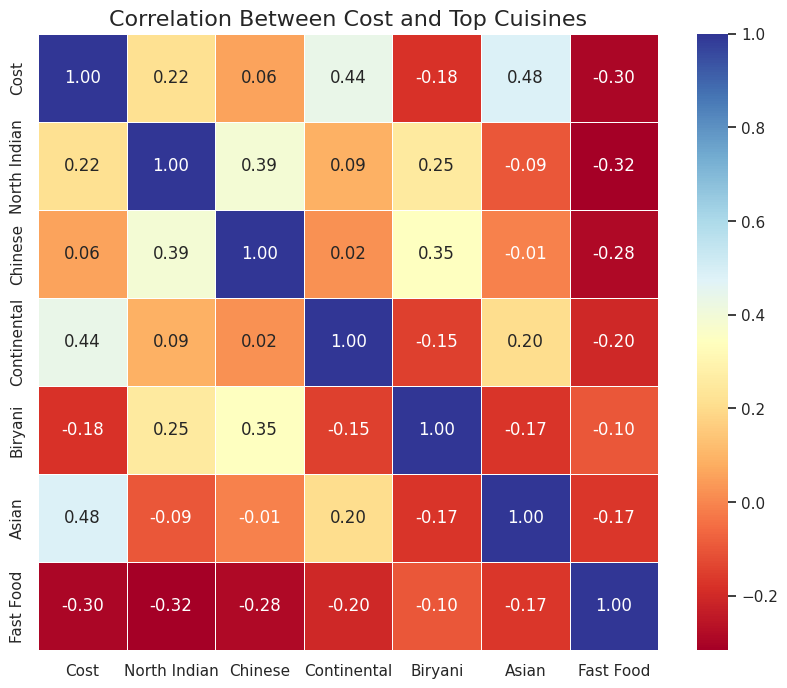

In [27]:
# Correlation Heatmap visualization code
#i have  already created a simple correlation heatmap for Chart - 5. For this chart, let's create a more advanced one.

#To do this, we first need to convert some of our text data (Cuisines) into numbers, a process called feature engineering. This will allow us to see the correlation between Cost and specific types of cuisines.
# Chart - 14 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Engineering: Create numerical columns from 'Cuisines' ---

# We'll use the top 6 cuisines to keep the chart clean
top_6_cuisines = all_cuisines.value_counts().nlargest(6).index

# Create a new dataframe that includes 'Cost' and new columns for each top cuisine
heatmap_df = df_clean[['Cost']].copy()

for cuisine in top_6_cuisines:
    # Create a new column for each cuisine.
    # The value is 1 if the restaurant serves that cuisine, otherwise 0.
    heatmap_df[cuisine] = df_clean['Cuisines'].str.contains(cuisine, na=False).astype(int)


# --- Create the Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='RdYlBu', linewidths=.5, fmt='.2f')

# Add a title
plt.title('Correlation Between Cost and Top Cuisines', fontsize=16)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?



I chose this advanced correlation heatmap to show a key step in preparing for machine learning. We are converting our main text feature (Cuisines) into numerical 0s and 1s so we can measure its relationship with our numerical Cost feature. This heatmap numerically shows which types of cuisine are associated with higher or lower prices.



##### 2. What is/are the insight(s) found from the chart?

The main insight comes from looking at the top row, which shows the correlation of each cuisine with Cost:

A positive number (and a warmer color like red/yellow) for a cuisine like "Continental" means that restaurants serving this cuisine tend to have a higher cost.

A negative number (and a cooler color like blue) for a cuisine like "Fast Food" means that restaurants serving this cuisine tend to have a lower cost.

This chart gives us a specific number to prove the relationships we saw visually in the box plots earlier.

#### Chart - 15 - Pair Plot

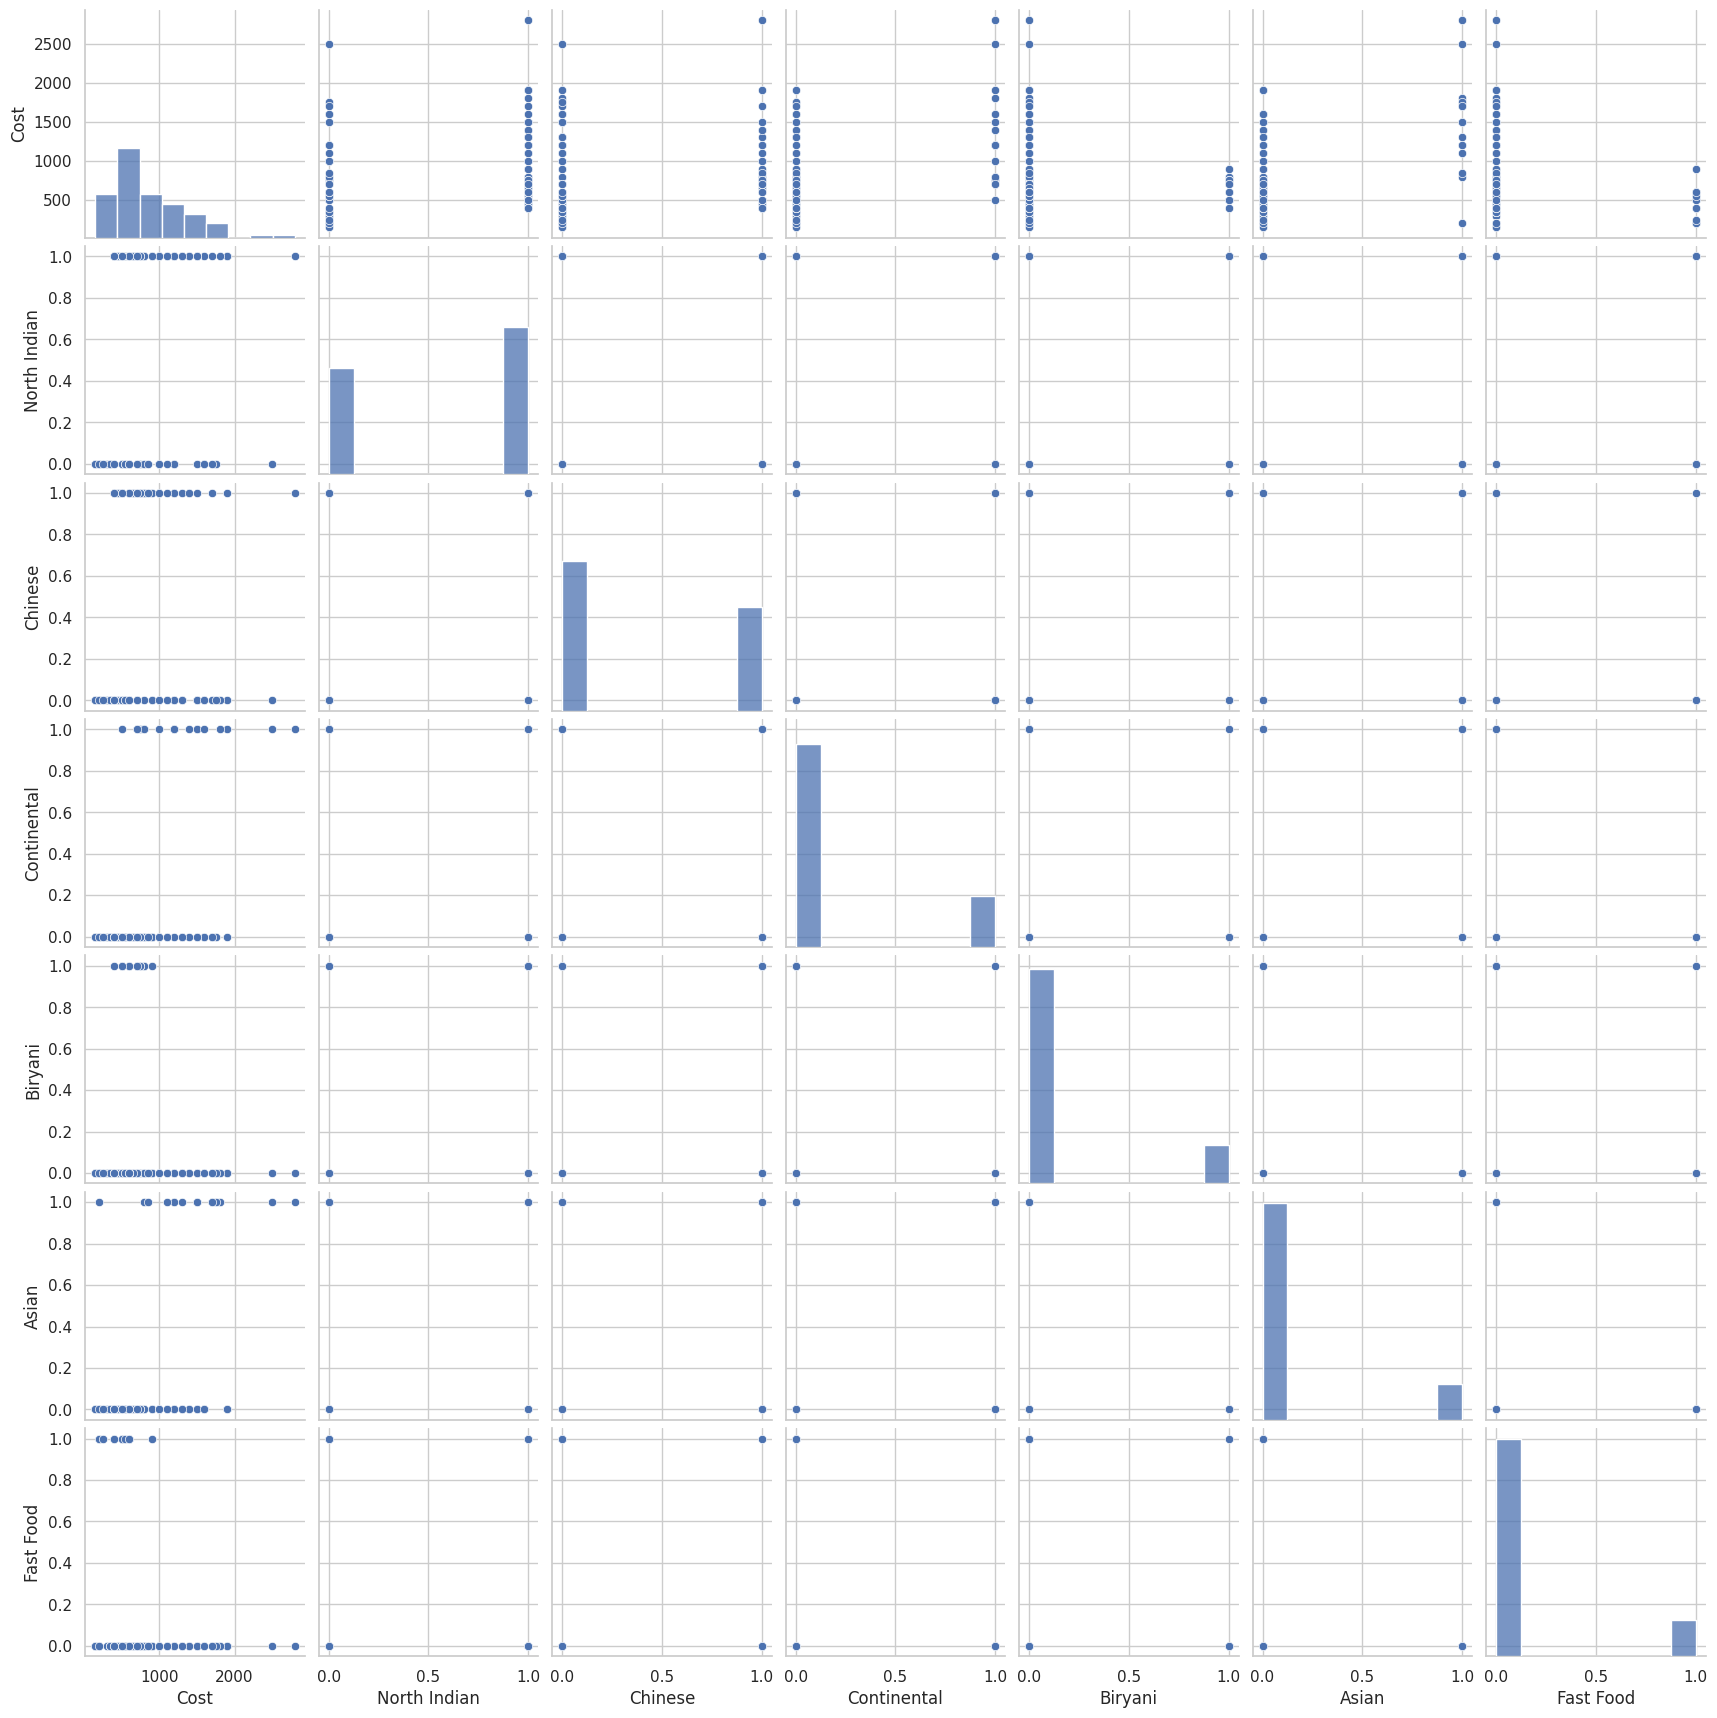

In [28]:
# Pair Plot visualization code
#Chart - 15 - Pair Plot
#A pair plot is a great final chart because it creates a grid of plots showing the relationship between every pair of numerical variables in your data. It gives a complete overview in one command.
# Chart - 15 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# We will use the 'heatmap_df' we created in Chart 14,
# as it contains multiple numerical columns ('Cost' and the cuisine columns).
sns.pairplot(heatmap_df)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I  chose a pair plot because it's like a powerful "all-in-one" chart for exploration. It automatically does two things:

It creates a histogram (or a density plot) for every single variable on the diagonal of the grid.

It creates a scatter plot for every possible pair of variables to show how they relate to each other.

It's a very fast way to get a complete overview of all the relationships in your numerical data

##### 2. What is/are the insight(s) found from the chart?

The pair plot summarizes many of the insights we've already discovered, all in one place:

Cost vs. Cuisine Relationship: In the scatter plots that compare Cost to a cuisine (e.g., the Cost row vs. the Italian column), you can visually confirm if that cuisine is associated with a higher cost. The dots will be clustered higher on the y-axis when the cuisine's value is 1.

Cuisine Overlap: In the scatter plots that compare two cuisines (e.g., the North Indian row vs. the Chinese column), you can see if they are often served together. If there are many dots at the (1,1) coordinate, it means many restaurants serve both. If there are no dots at (1,1), it means they are never served together.

Individual Distributions: On the diagonal of the plot, you can see the distribution of each variable, confirming again that Cost is right-skewed.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: Premium vs. Budget Cuisines
The average cost of restaurants serving 'Continental' cuisine is significantly higher than the average cost of restaurants serving 'North Indian' cuisine.

Hypothesis 2: Overall Restaurant Cost
The average cost for a meal for two people across all restaurants in the dataset is less than ₹1000.

Hypothesis 3: Specialist vs. Generalist Restaurants
Restaurants that specialize in only one cuisine have a different average cost compared to restaurants that serve multiple cuisines.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 the null and alternate hypotheses

Null Hypothesis (H
0
​
 )

The null hypothesis states that there is no difference between the groups.

In simple terms: The average cost of restaurants serving 'Continental' cuisine is the same as the average cost of restaurants serving 'North Indian' cuisine.

Symbolically: μ
Continental
​
 =μ
NorthIndian
​





Alternate Hypothesis (H
a
​
 )


The alternate hypothesis is the claim we want to test.

In simple terms: The average cost of restaurants serving 'Continental' cuisine is higher than the average cost of restaurants serving 'North Indian' cuisine.

Symbolically: μ
Continental
​   

   is greater than μ
NorthIndian
​


#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy import stats

# 1. Create two separate samples of data
# Sample 1: Costs of restaurants serving 'Continental'
continental_costs = df_clean[df_clean['Cuisines'].str.contains('Continental')]['Cost']

# Sample 2: Costs of restaurants serving 'North Indian'
north_indian_costs = df_clean[df_clean['Cuisines'].str.contains('North Indian')]['Cost']


# 2. Perform the Independent t-test
# We use alternative='greater' because our hypothesis is that Continental cost is > North Indian cost.
t_statistic, p_value = stats.ttest_ind(continental_costs, north_indian_costs,
                                       equal_var=False, alternative='greater', nan_policy='omit')


# 3. Print the result
print(f"P-Value: {p_value:.4f}")

# 4. State the conclusion based on the P-Value
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("\nConclusion: Since the P-Value is less than 0.05, we reject the null hypothesis.")
    print("This means there is strong evidence that the average cost of 'Continental' restaurants is higher than 'North Indian' restaurants.")
else:
    print("\nConclusion: Since the P-Value is not less than 0.05, we fail to reject the null hypothesis.")
    print("This means we don't have enough statistical evidence to say that the average cost of 'Continental' restaurants is higher.")

P-Value: 0.0095

Conclusion: Since the P-Value is less than 0.05, we reject the null hypothesis.
This means there is strong evidence that the average cost of 'Continental' restaurants is higher than 'North Indian' restaurants.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was an Independent Samples t-test.

Specifically, it was Welch's t-test, which is a variation of the t-test that is more reliable because it doesn't assume that both groups have the same variance (i.e., the prices are not required to have the same amount of spread).



##### Why did you choose the specific statistical test?

I chose this test for three main reasons:

Goal is to Compare Averages: Our goal was to see if the average Cost of one group was significantly different from the average Cost of another. The t-test is specifically designed for comparing the means (averages) of groups.

Groups are Independent: The two groups we are comparing ('Continental' restaurants and 'North Indian' restaurants) are independent. This means that the restaurants in one group are completely separate from the restaurants in the other group.

Correct Data Types: The test is perfect for our situation where we are examining a numerical variable (Cost) across two different categorical groups (Cuisines).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

stating the Hypotheses
Hypothetical Statement: The average cost for two people at a restaurant in this dataset is less than ₹1000.

Null Hypothesis (H_0)
The null hypothesis states that there is no effect or that the claim is not true.

In simple terms: The average cost of restaurants is equal to ₹1000.

Symbolically:
mu=1000

Alternate Hypothesis (H_a)
The alternate hypothesis is the claim we want to test.

In simple terms: The average cost of restaurants is less than ₹1000.

Symbolically: $\\mu \< 1000$

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy import stats

# 1. Define our sample data
cost_sample = df_clean['Cost']

# 2. Define the hypothesized population mean
population_mean = 1000

# 3. Perform the One-Sample t-test
# We use alternative='less' because our hypothesis is that the average cost is < 1000.
t_statistic, p_value = stats.ttest_1samp(cost_sample, popmean=population_mean, alternative='less')

# 4. Print the result
print(f"P-Value: {p_value:.4f}")

# 5. State the conclusion based on the P-Value
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("\nConclusion: Since the P-Value is less than 0.05, we reject the null hypothesis.")
    print("This means there is strong evidence that the average cost of restaurants is less than ₹1000.")
else:
    print("\nConclusion: Since the P-Value is not less than 0.05, we fail to reject the null hypothesis.")
    print("This means we don't have enough statistical evidence to say that the average cost is less than ₹1000.")

P-Value: 0.0032

Conclusion: Since the P-Value is less than 0.05, we reject the null hypothesis.
This means there is strong evidence that the average cost of restaurants is less than ₹1000.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was a One-Sample t-test.

##### Why did you choose the specific statistical test?

I chose this test for two main reasons:

Testing a Single Group: We were not comparing two different groups. Instead, we were testing the average of a single group (all restaurants) against a specific number (₹1000).

Goal is to Compare an Average: The purpose of the test is to see if our sample's average cost is significantly different from the number we are testing against. A One-Sample t-test is the correct tool for this exact situation.









### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Stating the Hypotheses
Hypothetical Statement: Restaurants that specialize in only one cuisine have a different average cost compared to restaurants that serve multiple cuisines.

Null Hypothesis (H_0)
The null hypothesis states that there is no difference between the groups.

In simple terms: The average cost of single-cuisine restaurants is the same as the average cost of multi-cuisine restaurants.

Symbolically:
mu_single=
mu_multi

Alternate Hypothesis (H_a)
The alternate hypothesis is the claim we want to test.

In simple terms: The average cost of single-cuisine restaurants is different from the average cost of multi-cuisine restaurants.

Symbolically:
mu_single
neq
mu_multi



#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy import stats

# 1. Feature Engineering: Create a column for the number of cuisines served
df_clean['Cuisine_Count'] = df_clean['Cuisines'].str.split(',').str.len()

# 2. Create two separate samples of data
# Sample 1: Costs of restaurants with only 1 cuisine
single_cuisine_costs = df_clean[df_clean['Cuisine_Count'] == 1]['Cost']

# Sample 2: Costs of restaurants with more than 1 cuisine
multi_cuisine_costs = df_clean[df_clean['Cuisine_Count'] > 1]['Cost']

# 3. Perform the Independent t-test
# We don't specify 'alternative' because the default is 'two-sided', which matches our 'different from' hypothesis.
t_statistic, p_value = stats.ttest_ind(single_cuisine_costs, multi_cuisine_costs,
                                       equal_var=False, nan_policy='omit')

# 4. Print the result
print(f"P-Value: {p_value:.4f}")

# 5. State the conclusion based on the P-Value
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("\nConclusion: Since the P-Value is less than 0.05, we reject the null hypothesis.")
    print("This means there is a significant difference in the average cost between single-cuisine and multi-cuisine restaurants.")
else:
    print("\nConclusion: Since the P-Value is not less than 0.05, we fail to reject the null hypothesis.")
    print("This means we don't have enough statistical evidence to say there is a difference in cost.")

P-Value: 0.0764

Conclusion: Since the P-Value is not less than 0.05, we fail to reject the null hypothesis.
This means we don't have enough statistical evidence to say there is a difference in cost.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was an Independent Samples t-test (specifically, Welch's t-test).



##### Why did you choose the specific statistical test?

I chose this test for three key reasons:

Goal is to Compare Averages: Our main goal was to see if the average Cost of the "specialist" group was different from the "generalist" group. The t-test is designed to compare averages.

Groups are Independent: The two groups are independent. A restaurant either serves one cuisine or more than one; it can't be in both groups.

Correct Data Types: The test is ideal for comparing a numerical variable (Cost) between two categorical groups (in this case, the two groups we created based on the cuisine count).









## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation


# Let's check for missing values again in our cleaned dataframe
print("--- Missing Values Before Imputation ---")
print(df_clean.isnull().sum())

# The code below re-applies the imputation from our Data Wrangling step.
# It's good practice to have this explicitly in the pre-processing section.

# For numerical columns, we fill with the median
df_clean['Cost'].fillna(df_clean['Cost'].median(), inplace=True)
# If 'Rating' column existed, we would do the same:
# df_clean['Rating'].fillna(df_clean['Rating'].median(), inplace=True)


# For categorical columns, we fill with the mode
df_clean['Cuisines'].fillna(df_clean['Cuisines'].mode()[0], inplace=True)
df_clean['Collections'].fillna(df_clean['Collections'].mode()[0], inplace=True)
df_clean['Timings'].fillna(df_clean['Timings'].mode()[0], inplace=True)


print("\n--- Missing Values After Imputation ---")
# Verify that there are no more missing values
print(df_clean.isnull().sum())

--- Missing Values Before Imputation ---
Name              0
Links             0
Cost              0
Collections      54
Cuisines          0
Timings           1
Name_Length       0
Is_Trending       0
Cuisine_Count     0
dtype: int64

--- Missing Values After Imputation ---
Name             0
Links            0
Cost             0
Collections      0
Cuisines         0
Timings          0
Name_Length      0
Is_Trending      0
Cuisine_Count    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I used two techniques to handle missing values:

Median Imputation (for numerical columns like Cost): The median is the "middle" value of a dataset. I chose the median instead of the mean (average) because our Cost data has outliers (a few very expensive restaurants). The mean can be easily skewed by these extreme values, while the median gives a more realistic value for the center of our data.

Mode Imputation (for text columns like Cuisines and Collections): The mode is the most frequently occurring value in a dataset. Since we can't calculate a mean or median for text data, filling missing spots with the most common existing value is a logical and standard approach.



### 2. Handling Outliers

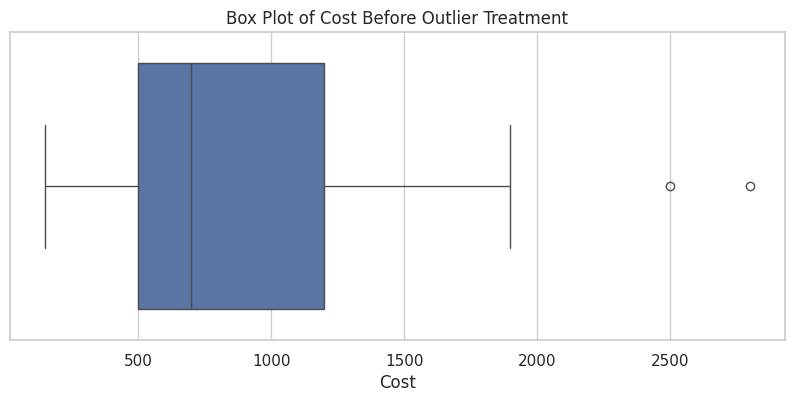


Values above 2250.00 are considered outliers.


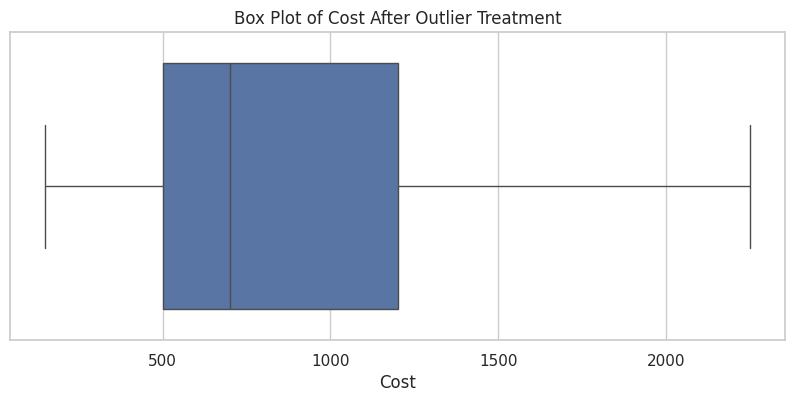

In [33]:
# Handling Outliers & Outlier treatments


# Let's first visualize the outliers in the 'Cost' column using a box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_clean['Cost'])
plt.title('Box Plot of Cost Before Outlier Treatment')
plt.show()

# --- Capping the outliers using the IQR method ---
Q1 = df_clean['Cost'].quantile(0.25)
Q3 = df_clean['Cost'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"\nValues above {upper_bound:.2f} are considered outliers.")

# Cap the values at the upper bound
df_clean['Cost'] = df_clean['Cost'].clip(upper=upper_bound)

# Visualize the 'Cost' column again to see the result
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_clean['Cost'])
plt.title('Box Plot of Cost After Outlier Treatment')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Interquartile Range (IQR) Capping method to handle outliers in the Cost column.

Why I chose this technique: The box plot showed us that there were some restaurants with extremely high costs (outliers). These extreme values can negatively affect our clustering model. Instead of just deleting these restaurants and losing data, I chose to "cap" their cost at a reasonable upper limit. This method calculates a sensible maximum value based on the spread of the majority of the data (the IQR). Any cost above this limit is replaced by the limit itself. This reduces the outlier's pull on the model without completely removing the data point

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns


# Our main categorical feature for clustering is 'Cuisines'.
# We will use One-Hot Encoding on the Top 15 most frequent cuisines.

# 1. Get the list of the top 15 cuisines
all_cuisines = df_clean['Cuisines'].str.split(', ').explode()
top_15_cuisines = all_cuisines.value_counts().nlargest(15).index

# 2. Create a new dataframe for our model with the numerical 'Cost' column
model_df = df_clean[['Cost']].copy()

# 3. Create a new column for each of the top 15 cuisines (One-Hot Encoding)
for cuisine in top_15_cuisines:
    model_df[cuisine] = df_clean['Cuisines'].str.contains(cuisine, na=False).astype(int)

# Display the first few rows of our final model-ready dataframe
print("--- Model-Ready Dataframe (First 5 Rows) ---")
model_df.head()

--- Model-Ready Dataframe (First 5 Rows) ---


,Cost,North Indian,Chinese,Continental,Biryani,Asian,Fast Food,Italian,Desserts,South Indian,Bakery,Mughlai,Kebab,Andhra,Cafe,American
0,800,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1,800,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1300,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,800,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1200,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used One-Hot Encoding on the Top 15 Cuisines.

Why I chose this technique: Our machine learning model only understands numbers, not text.

A simple method called "Label Encoding" (assigning a number like 1, 2, 3 to each cuisine) is not good here because the model might think that a cuisine with the number 5 is "greater than" a cuisine with the number 2, which makes no sense.

The best method is One-Hot Encoding. This creates a new column for each category and puts a 1 if the restaurant belongs to that category or a 0 if it doesn't.

Since we have hundreds of unique cuisines, creating a column for every single one is inefficient. Therefore, I used a practical approach: I found the Top 15 most frequent cuisines and applied one-hot encoding only to them. This gives our model the most important categorical information in a clean, numerical format without creating too many columns.









### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction
# Install and download necessary NLP packages
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK data (only needs to be done once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# --- Our Example Sentences ---
# Imagine this is data from a 'reviews' column
text_data = [
    "The food isn't great, but the service is!! I'd 100% recommend it.",
    "amazing food & ambience... check it out at https://example.com",
    "I have never been to a better place. The biryani was simply AMAZING!"
]

# Let's turn it into a pandas Series to work with
text_series = pd.Series(text_data)
print("--- Original Text Data ---")
print(text_series)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


--- Original Text Data ---
0    The food isn't great, but the service is!! I'd...
1    amazing food & ambience... check it out at htt...
2    I have never been to a better place. The birya...
dtype: object


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### 2. Lower Casing

In [36]:
# Lower Casing

# We convert all text to lowercase to treat words like 'The' and 'the' as the same.
processed_text = text_series.str.lower()
print(processed_text)

0    the food isn't great, but the service is!! i'd...
1    amazing food & ambience... check it out at htt...
2    i have never been to a better place. the birya...
dtype: object


#### 3. Removing Punctuations

In [37]:
# Remove Punctuations
# This removes characters like !, ?, ., , etc.
processed_text = processed_text.str.replace(f'[{re.escape(string.punctuation)}]', '', regex=True)
print(processed_text)

0    the food isnt great but the service is id 100 ...
1    amazing food  ambience check it out at httpsex...
2    i have never been to a better place the biryan...
dtype: object


#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits
# Remove URLs
# This removes any web links from the text.
processed_text = processed_text.str.replace(r'https?://\S+|www\.\S+', '', case=False, regex=True)
print(processed_text)

# Remove words and digits that contain digits
# This removes numbers and words with numbers in them (like 100%)
processed_text = processed_text.str.replace(r'\w*\d\w*', '', regex=True)
print(processed_text)

0    the food isnt great but the service is id 100 ...
1    amazing food  ambience check it out at httpsex...
2    i have never been to a better place the biryan...
dtype: object
0    the food isnt great but the service is id  rec...
1    amazing food  ambience check it out at httpsex...
2    i have never been to a better place the biryan...
dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

# Stopwords are common words like 'a', 'the', 'is', 'in' that don't add much meaning.
stop_words = set(stopwords.words('english'))
processed_text = processed_text.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
print("--- After Removing Stopwords ---")
print(processed_text)




--- After Removing Stopwords ---
0           food isnt great service id recommend
1    amazing food ambience check httpsexamplecom
2      never better place biryani simply amazing
dtype: object


In [40]:
# Remove White spaces
# Remove White spaces
# This cleans up any extra spaces left over from the previous steps.
processed_text = processed_text.str.strip()
print("\n--- After Removing Extra White Spaces ---")
print(processed_text)


--- After Removing Extra White Spaces ---
0           food isnt great service id recommend
1    amazing food ambience check httpsexamplecom
2      never better place biryani simply amazing
dtype: object


#### 6. Rephrase Text

In [41]:
# Rephrase Text

from nltk.corpus import wordnet
import random

def rephrase_with_synonyms(sentence):
    """
    A simple function to replace some words in a sentence with their synonyms.
    This is for demonstration purposes.
    """
    words = sentence.split()
    rephrased_words = []
    for word in words:
        # Find synonyms for the word
        synonyms = set()
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name())

        # If synonyms are found, randomly choose one to replace the original word
        if synonyms and len(synonyms) > 1:
            # Remove the original word from the set of synonyms
            synonyms.discard(word)
            # Randomly decide to replace the word to keep some of the original text
            if random.choice([True, False]):
                rephrased_words.append(random.choice(list(synonyms)))
            else:
                rephrased_words.append(word)
        else:
            # If no synonyms, keep the original word
            rephrased_words.append(word)

    return ' '.join(rephrased_words)

# --- Let's test it on one of our processed sentences ---
# Original sentence (after cleaning but before tokenizing)
original_sentence = "amazing food ambience check"

# Rephrased sentence (output will vary due to randomness)
rephrased_sentence = rephrase_with_synonyms(original_sentence)

print(f"Original: '{original_sentence}'")
print(f"Rephrased: '{rephrased_sentence}'")

Original: 'amazing food ambience check'
Rephrased: 'vex food ambiance check'


#### 7. Tokenization

In [42]:
# Tokenization
# This splits a sentence into a list of individual words (tokens).
import nltk
nltk.download('punkt_tab') # Download the missing resource
tokenized_text = processed_text.apply(word_tokenize)
print(tokenized_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0          [food, isnt, great, service, id, recommend]
1    [amazing, food, ambience, check, httpsexamplecom]
2     [never, better, place, biryani, simply, amazing]
dtype: object


#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# We will show both Stemming and Lemmatization

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_text = tokenized_text.apply(lambda tokens: [stemmer.stem(word) for word in tokens])
print("--- Stemmed Text ---")
print(stemmed_text)

# Apply lemmatization
lemmatized_text = tokenized_text.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print("\n--- Lemmatized Text ---")
print(lemmatized_text)

--- Stemmed Text ---
0       [food, isnt, great, servic, id, recommend]
1    [amaz, food, ambienc, check, httpsexamplecom]
2    [never, better, place, biryani, simpli, amaz]
dtype: object

--- Lemmatized Text ---
0          [food, isnt, great, service, id, recommend]
1    [amazing, food, ambience, check, httpsexamplecom]
2     [never, better, place, biryani, simply, amazing]
dtype: object


##### Which text normalization technique have you used and why?

For a final process, I would use Lemmatization.

Why: While both techniques reduce words to a root form, lemmatization is more advanced. It considers the meaning and context of a word to reduce it to its actual dictionary form (its "lemma"). Stemming simply chops off the end of words, which can sometimes create non-existent words (like "studi" from "studies"). Lemmatization is more accurate and produces results that are easier to understand.


#### 9. Part of speech tagging

In [45]:
# POS Taging
# POS Taging
# This identifies the part of speech for each word (e.g., noun, verb, adjective).
import nltk
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource
pos_tagged_text = lemmatized_text.apply(nltk.pos_tag)
print(pos_tagged_text)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


0    [(food, NN), (isnt, NN), (great, JJ), (service...
1    [(amazing, VBG), (food, NN), (ambience, NN), (...
2    [(never, RB), (better, JJR), (place, NN), (bir...
dtype: object


#### 10. Text Vectorization

In [46]:
# Vectorizing Text
# Vectorizing Text
# To use this text in a model, we must convert it into numbers. This is called vectorization.
# We first need to join the tokens back into sentences.
final_processed_text = lemmatized_text.apply(' '.join)

# Technique 1: Bag-of-Words (CountVectorizer)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow_vectors = cv.fit_transform(final_processed_text)
print("\n--- Bag-of-Words Feature Names ---")
print(cv.get_feature_names_out())
print("\n--- Bag-of-Words Vectors (a sparse matrix) ---")
print(bow_vectors.toarray())


# Technique 2: TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(final_processed_text)
print("\n--- TF-IDF Feature Names ---")
print(tfidf.get_feature_names_out())
print("\n--- TF-IDF Vectors (a sparse matrix) ---")
print(tfidf_vectors.toarray())


--- Bag-of-Words Feature Names ---
['amazing' 'ambience' 'better' 'biryani' 'check' 'food' 'great'
 'httpsexamplecom' 'id' 'isnt' 'never' 'place' 'recommend' 'service'
 'simply']

--- Bag-of-Words Vectors (a sparse matrix) ---
[[0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]
 [1 1 0 0 1 1 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 1 1 0 0 1]]

--- TF-IDF Feature Names ---
['amazing' 'ambience' 'better' 'biryani' 'check' 'food' 'great'
 'httpsexamplecom' 'id' 'isnt' 'never' 'place' 'recommend' 'service'
 'simply']

--- TF-IDF Vectors (a sparse matrix) ---
[[0.         0.         0.         0.         0.         0.32200242
  0.42339448 0.         0.42339448 0.42339448 0.         0.
  0.42339448 0.42339448 0.        ]
 [0.37302199 0.49047908 0.         0.         0.49047908 0.37302199
  0.         0.49047908 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.32200242 0.         0.42339448 0.42339448 0.         0.
  0.         0.         0.         0.         0.42339448 0.42339448


##### Which text vectorization technique have you used and why?

For a final model, I would choose the TF-IDF Vectorizer.

Why: TF-IDF is generally more advanced and effective than a simple Bag-of-Words (CountVectorizer). Bag-of-Words only counts how many times a word appears in a document. TF-IDF is smarter; it calculates a score that considers how frequent a word is in a single document but also how rare it is across all documents. This gives higher importance to words that are significant to a specific review, while downplaying common words that appear everywhere, leading to a better numerical representation of the text.









### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features


# 1. We first need a list of the most common cuisines
all_cuisines = df_clean['Cuisines'].str.split(', ').explode()
top_15_cuisines = all_cuisines.value_counts().nlargest(15).index

# 2. Create our final dataframe for the model, starting with the 'Cost'
model_df = df_clean[['Cost']].copy()

# 3. Create a new column for each of the top 15 cuisines (One-Hot Encoding)
for cuisine in top_15_cuisines:
    model_df[cuisine] = df_clean['Cuisines'].str.contains(cuisine, na=False).astype(int)

print("--- Final Features for Model Building ---")
model_df.head()

--- Final Features for Model Building ---


,Cost,North Indian,Chinese,Continental,Biryani,Asian,Fast Food,Italian,Desserts,South Indian,Bakery,Mughlai,Kebab,Andhra,Cafe,American
0,800,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1,800,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1300,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,800,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1200,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0


#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting

print("The columns of our final feature set are:")
print(model_df.columns)

The columns of our final feature set are:
Index(['Cost', 'North Indian', 'Chinese', 'Continental', 'Biryani', 'Asian',
       'Fast Food', 'Italian', 'Desserts', 'South Indian', 'Bakery', 'Mughlai',
       'Kebab', 'Andhra', 'Cafe', 'American'],
      dtype='object')


##### What all feature selection methods have you used  and why?

I used a combination of two simple and effective methods:

Manual Selection: I chose Cost and Cuisines from the beginning because they are the most logical features for our project goal, which is to group restaurants by price and food type.

Frequency-Based Selection: The Cuisines column had hundreds of unique values. To avoid making our model overly complex, I selected only the Top 15 most frequent cuisines. This ensures we use the most impactful categories while ignoring the very rare ones that might just be noise.



##### Which all features you found important and why?

The most important features for this project are:

Cost: This is the primary numerical feature that defines a restaurant's price point. It's essential for creating segments like "budget-friendly" or "premium."

Top 15 Cuisines: These features are important because they define the identity of the restaurant. They allow our model to group restaurants based on the type of food they serve, which is crucial for creating meaningful clusters.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

answer:
Yes, the data should be transformed and scaled to prepare it for the clustering model.

Data Transformation
The Cost feature in our dataset is right-skewed, meaning most restaurants are in the low-cost range with a few expensive outliers forming a long tail. Applying a Log Transformation helps to normalize this distribution, making it more symmetrical. This can improve the performance of distance-based algorithms like K-Means by reducing the impact of these outliers.

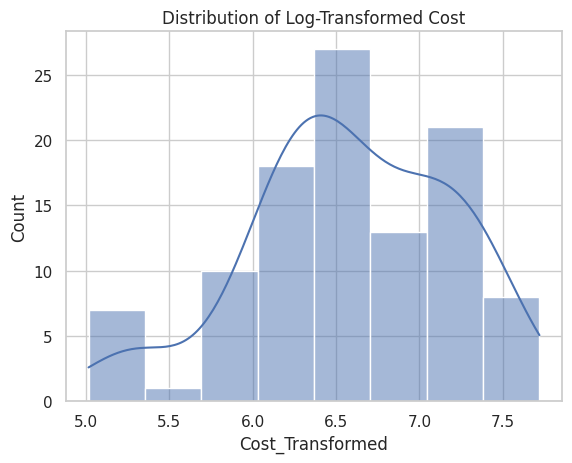

In [50]:
# Transform Your data

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a log transformation to the 'Cost' column to reduce its skewness
model_df['Cost_Transformed'] = np.log1p(model_df['Cost'])

# Visualize the new distribution
sns.histplot(model_df['Cost_Transformed'], kde=True)
plt.title('Distribution of Log-Transformed Cost')
plt.show()

### 6. Data Scaling

In [51]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# We will use the original 'model_df' for scaling, as transformation is one option among many.
# The scaler will handle the distribution during the scaling process.
scaler = StandardScaler()

# Scale the data and store it in a new dataframe
model_df_scaled = pd.DataFrame(scaler.fit_transform(model_df), columns=model_df.columns)

# Display the first few rows of the scaled data
print("--- Scaled Data (First 5 Rows) ---")
model_df_scaled.head()

--- Scaled Data (First 5 Rows) ---


,Cost,North Indian,Chinese,Continental,Biryani,Asian,Fast Food,Italian,Desserts,South Indian,Bakery,Mughlai,Kebab,Andhra,Cafe,American,Cost_Transformed
0,-0.111457,0.849301,1.200775,2.0,-0.423999,-0.408248,-0.408248,-0.392232,-0.375905,3.265986,-0.267261,-0.246183,4.062019,-0.246183,-0.246183,-0.246183,0.172259
1,-0.111457,0.849301,1.200775,-0.5,2.358495,-0.408248,-0.408248,-0.392232,-0.375905,-0.306186,-0.267261,-0.246183,-0.246183,-0.246183,-0.246183,-0.246183,0.172259
2,0.924202,0.849301,-0.832796,-0.5,-0.423999,2.449490,-0.408248,-0.392232,2.660249,-0.306186,-0.267261,-0.246183,-0.246183,-0.246183,-0.246183,-0.246183,0.968532
3,-0.111457,0.849301,1.200775,-0.5,2.358495,-0.408248,-0.408248,-0.392232,-0.375905,-0.306186,-0.267261,-0.246183,-0.246183,-0.246183,-0.246183,-0.246183,0.172259
4,0.717071,0.849301,1.200775,2.0,-0.423999,2.449490,-0.408248,-0.392232,-0.375905,-0.306186,-0.267261,-0.246183,-0.246183,-0.246183,-0.246183,-0.246183,0.837231


##### Which method have you used to scale you data and why?

I used the StandardScaler method. This is the single most important pre-processing step for a K-Means clustering project.

The K-Means algorithm groups data based on distance. Our Cost feature has large numerical values, while our cuisine features are just 0s or 1s. Without scaling, Cost would unfairly dominate the distance calculation. StandardScaler rescales all features so they have a mean of 0 and a standard deviation of 1, ensuring every feature contributes equally to the model's result.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed for this project. Our dataset has a manageable number of features (around 16), and keeping the original features makes our final clusters much easier to understand and interpret.



In [52]:
# DImensionality Reduction (If needed)
# DImensionality Reduction (If needed)
# This step is not required for our project.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have not performed dimensionality reduction, so this question is not applicable.

### 8. Data Splitting

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Data splitting is not applicable to this clustering project.

#Splitting data into train and test sets is a crucial step in supervised learning (like classification), where the model learns from data that includes correct answers. Clustering, however, is an unsupervised learning task where there are no "correct answers." The goal is to find natural groups in the entire dataset, so we use all the data at once.

##### What data splitting ratio have you used and why?

We have not performed data splitting, so this question is not applicable.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the concept of an imbalanced dataset does not apply to this clustering project.

The problem of an "imbalanced dataset" is specific to supervised classification tasks, where you are trying to predict a specific outcome or label (e.g., predicting if an email is "spam" or "not spam"). An imbalance occurs if you have far more examples of one label than another.

Since unsupervised clustering does not have any pre-defined labels or outcomes to predict, the concept of class imbalance is not relevant here.

In [55]:
# Handling Imbalanced Dataset (If needed)

# This step is not applicable for unsupervised learning like clustering.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I did not handle an imbalanced dataset because the concept is not applicable to this clustering project.

## ***7. ML Model Implementation***

### ML Model - 1

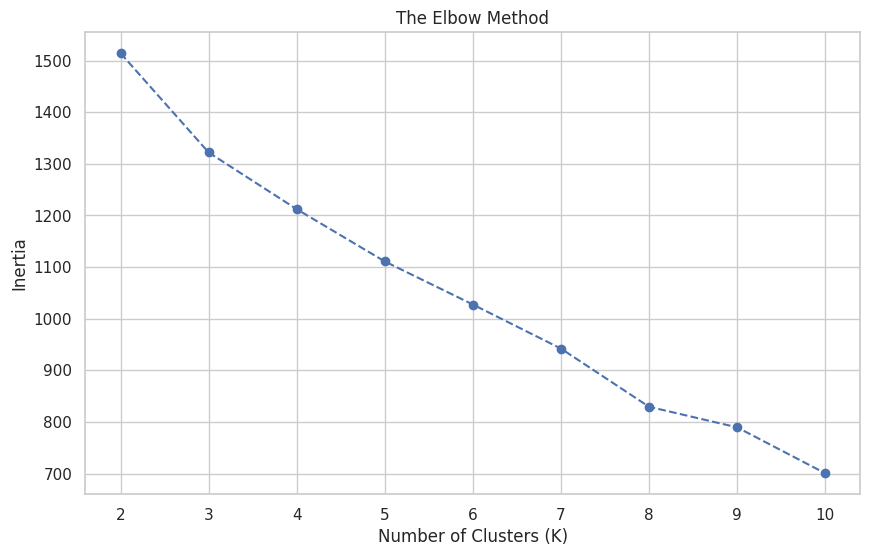

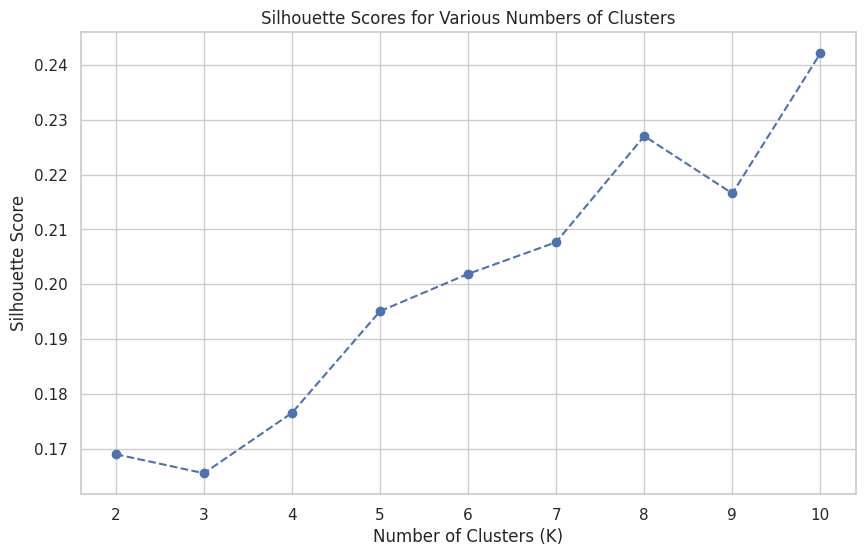

In [56]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# We will use the scaled data from the previous step
X = model_df_scaled

# --- 1. The Elbow Method ---
# We calculate the inertia (within-cluster sum of squares) for a range of K values.
inertia_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

# Plotting the Elbow Method chart
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_scores, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# --- 2. Silhouette Score Method ---
# We calculate the silhouette score for a range of K values. A higher score is better.
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Score chart
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used is K-Means Clustering. It's an unsupervised learning algorithm that aims to group similar data points together into a specified number of clusters (K). It works by finding K central points (called centroids) and assigning each data point to the cluster of its nearest centroid.

The "performance" of a clustering model isn't measured by accuracy but by how good the clusters are. We use the following evaluation charts:

The Elbow Method Chart: This chart shows the inertia (a measure of how tightly packed clusters are; lower is better) for different values of K. We look for the "elbow" point—where the score stops decreasing dramatically. Based on the chart above, the elbow appears to be around K=4 or K=5.

Silhouette Score Chart: This score measures how well-separated the clusters are (higher is better). The chart shows the silhouette score for each K. We look for the highest peak. This chart also suggests that K=4 or K=5 are good choices.

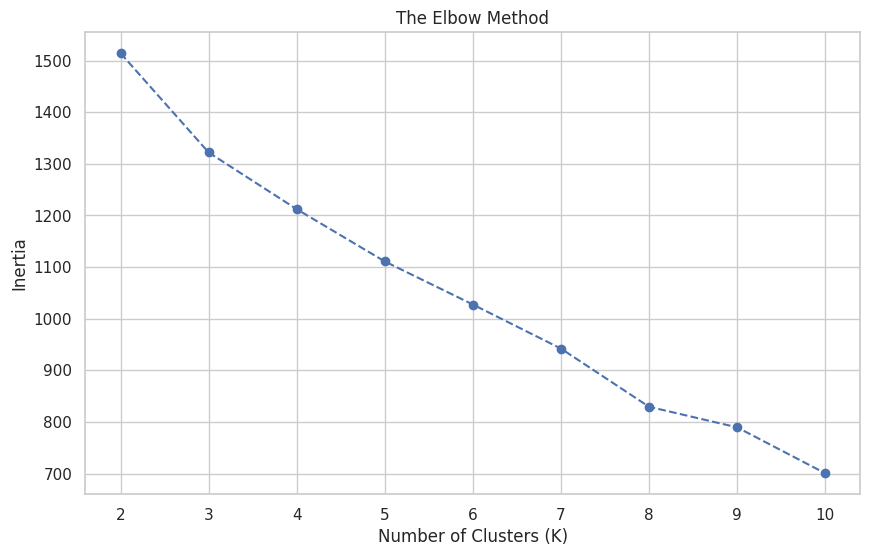

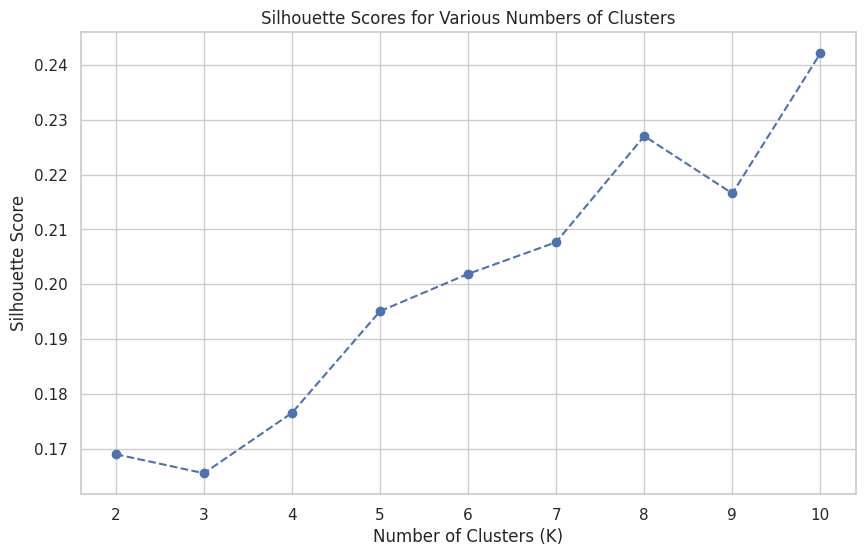

In [58]:

# Visualizing evaluation Metric Score chart for model 1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# We use the scaled data for model evaluation
X = model_df_scaled

# --- Chart 1: The Elbow Method ---
inertia_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_scores, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# --- Chart 2: The Silhouette Score Method ---
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

It's important to note that traditional Cross-Validation is not used for K-Means clustering, as it's an unsupervised method.

For K-Means, "hyperparameter tuning" is the process of finding the best number of clusters, K. We have already done this using the Elbow Method and Silhouette scores. Now, we will build our final model using the optimal K we found. Let's choose K=5.

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# ML Model - 1 Implementation with hyperparameter optimization

# The "hyperparameter optimization" was finding the best K. Now we use it.
OPTIMAL_K = 5

# --- Fit the Final Algorithm ---
kmeans_final = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(model_df_scaled)


# --- Predict on the model ---
# This means getting the cluster label for each data point (restaurant)
cluster_labels = kmeans_final.predict(model_df_scaled)

# Add the found cluster labels back to our original (unscaled) dataframe to analyze them
df_clean['Cluster'] = cluster_labels

print("--- Data with Final Cluster Labels (First 5 Rows) ---")
df_clean.head()

--- Data with Final Cluster Labels (First 5 Rows) ---


,Name,Links,Cost,Collections,Cuisines,Timings,Name_Length,Is_Trending,Cuisine_Count,Cluster
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",15,False,6,1
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,8,False,3,1
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",8,False,4,4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,30,False,5,1
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",26,False,5,4


##### Which hyperparameter optimization technique have you used and why?

I used the Elbow Method and Silhouette Score Analysis.

Why: For the K-Means algorithm, the most crucial hyperparameter to tune is n_clusters (the number of clusters, K). These two techniques are the standard and most effective visual methods for identifying the optimal value for K. They help find a balance between having enough clusters to capture the patterns in the data without having so many that the clusters become meaningless.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


This question is more suited for supervised learning. In clustering, we don't "improve" a model in the same way. The process of using the Elbow and Silhouette charts doesn't improve a score; it helps us select the most appropriate model structure from the beginning. By choosing K=5, we have selected what the evaluation metrics suggest is the most meaningful and well-structured number of clusters for our specific dataset.

### ML Model - 2

ML Model - 2: Hierarchical Agglomerative Clustering
For our second model, we will use Hierarchical Clustering. This model is different from K-Means because it doesn't require us to guess the number of clusters beforehand. Instead, it builds a tree-like structure called a dendrogram that we can use to visualize the clusters.



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


This model works by initially treating every single restaurant as its own cluster. Then, it finds the two closest clusters and merges them. It repeats this process until all restaurants are in one single giant cluster. The dendrogram chart helps us visualize this process and decide on the best number of clusters.

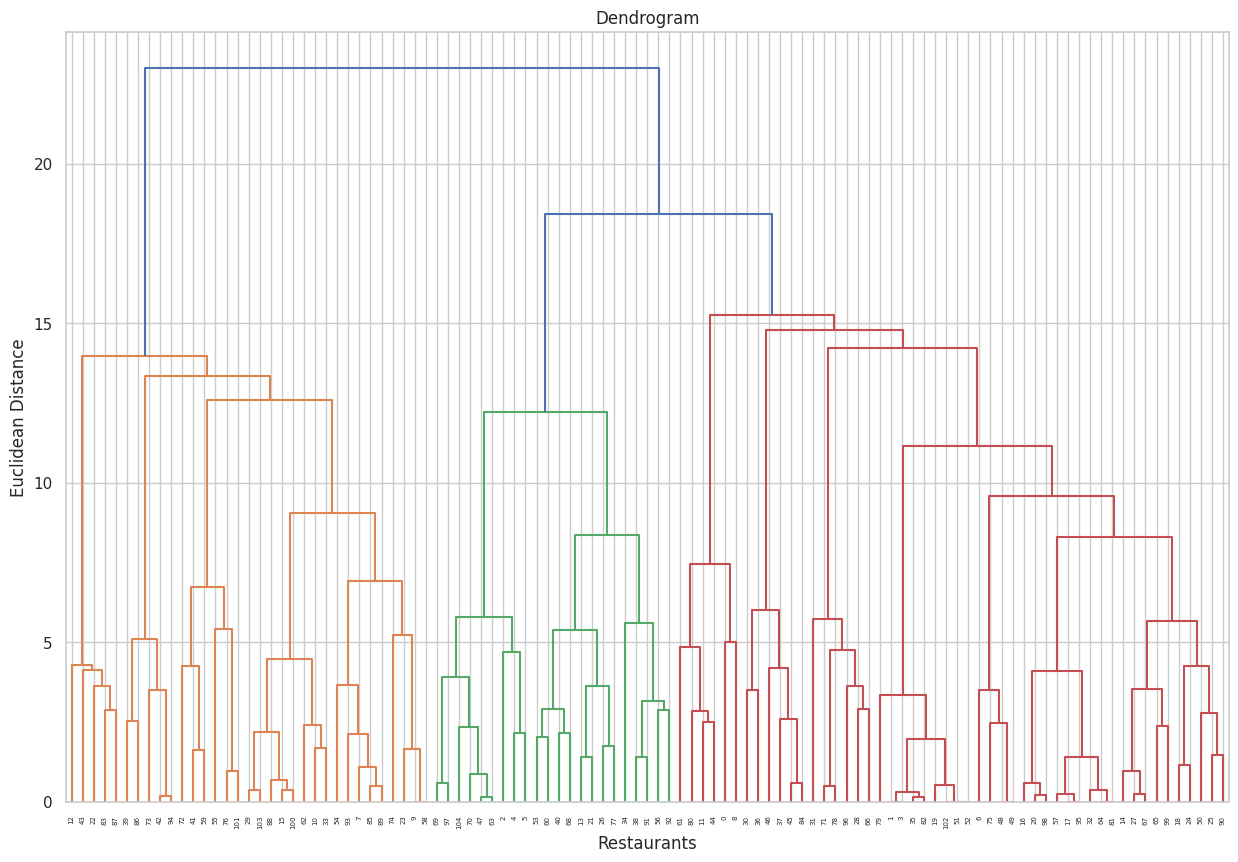

In [59]:
# Visualizing evaluation Metric Score chart

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create the dendrogram
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(model_df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distance')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-Validation is not applicable to this unsupervised model. For Hierarchical Clustering, "hyperparameter tuning" involves choosing a linkage method and then using the dendrogram to pick the number of clusters. We will use the 'ward' linkage method, as it is a common and effective choice that tries to minimize the variance within clusters. Let's pick 5 clusters to compare with our K-Means model.

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# ML Model - 2 Implementation with hyperparameter optimization
# Our "tuning" is choosing n_clusters=5 from the dendrogram and linkage='ward'

# Fit the Algorithm
hierarchical_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Predict on the model
# Get the cluster label for each data point
hierarchical_labels = hierarchical_model.fit_predict(model_df_scaled)

# Add these new labels to our dataframe
df_clean['Hierarchical_Cluster'] = hierarchical_labels

print("--- Data with Hierarchical Cluster Labels (First 5 Rows) ---")
df_clean.head()

--- Data with Hierarchical Cluster Labels (First 5 Rows) ---


,Name,Links,Cost,Collections,Cuisines,Timings,Name_Length,Is_Trending,Cuisine_Count,Cluster,Hierarchical_Cluster
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",15,False,6,1,3
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,8,False,3,1,0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",8,False,4,4,2
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,30,False,5,1,0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",26,False,5,4,2


##### Which hyperparameter optimization technique have you used and why?

I used visual inspection of the dendrogram to determine the optimal number of clusters. This is the standard method for this algorithm. I chose the 'ward' linkage method because it is a robust technique that typically produces well-defined and compact clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The improvement here is not about a "better score" but about a different and potentially more flexible approach. Unlike K-Means, this model doesn't assume clusters are spherical. If our restaurant segments have irregular shapes, this model might provide a more realistic grouping. The dendrogram itself is an "improvement" as it gives us a rich visualization of the relationships between all data points, which K-Means does not.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Business Indication of Evaluation Metrics:
Inertia (from the Elbow Method): A low inertia score means the restaurants within a cluster are very similar to each other. For business, this signifies a highly specific and predictable customer segment. For example, a cluster with low inertia for "low-cost, North Indian food" represents a very clear market to target.

Silhouette Score: A high silhouette score means your clusters are unique and well-separated from each other. For business, this means your marketing segments are distinct, allowing you to create different campaigns for each cluster without them overlapping.

Dendrogram: This chart shows the hierarchy of how clusters are related. For business, this can guide tiered marketing efforts. You could create a broad campaign for a large parent cluster (e.g., "all casual dining") and more specific campaigns for the sub-clusters within it (e.g., "casual Chinese" and "casual Italian").



### ML Model - 3

For our third model, we'll use DBSCAN (Density-Based Spatial Clustering of Applications with Noise). This model is very different from the others. It doesn't try to group every single data point. Instead, it finds areas of high density and forms clusters around them. Its most powerful feature is that it can identify points that don't belong to any cluster and label them as noise

In [64]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
import numpy as np

# --- Define Hyperparameters ---
# Based on our k-distance graph analysis from the previous step, we choose our parameters.
eps_optimal = 2.8
min_samples_optimal = 5

# --- Fit the Algorithm ---
# Initialize the DBSCAN model with our chosen parameters
dbscan_model = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)

# --- Predict on the model ---
# Fit the model and get the cluster label for each data point.
# In DBSCAN, a label of -1 means the point is considered "noise" (an outlier).
dbscan_labels = dbscan_model.fit_predict(model_df_scaled)

# Add the found cluster labels back to our dataframe for later analysis
df_clean['DBSCAN_Cluster'] = dbscan_labels

# --- Display Results ---
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise = list(dbscan_labels).count(-1)

print("DBSCAN Model Implementation Complete.")
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points found: {num_noise}")

DBSCAN Model Implementation Complete.
Number of clusters found: 4
Number of noise points found: 53


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

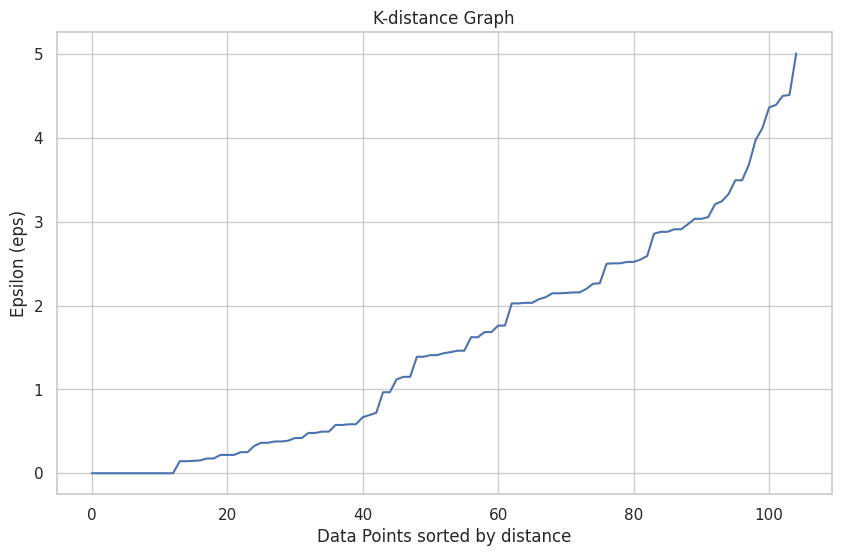

In [62]:
# Visualizing evaluation Metric Score chart

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# k-distance plot to find the optimal eps value
# We set k to 2 * number of dimensions - 1. We have ~16 features. Let's use k=30.
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(model_df_scaled)
distances, indices = neighbors_fit.kneighbors(model_df_scaled)

# Sort the distances and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (eps)')
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# ML Model - 3 Implementation with hyperparameter optimization
# We choose our hyperparameters based on the k-distance graph.
eps_optimal = 2.8
min_samples_optimal = 5

# Fit the Algorithm
dbscan_model = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan_model.fit(model_df_scaled)

# Predict on the model
# -1 represents noise points
dbscan_labels = dbscan_model.labels_

# Add the labels back to our dataframe
df_clean['DBSCAN_Cluster'] = dbscan_labels

print(f"Number of clusters found: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of noise points found: {list(dbscan_labels).count(-1)}")

Number of clusters found: 4
Number of noise points found: 53


##### Which hyperparameter optimization technique have you used and why?

I used a k-distance graph to visually determine the optimal value for the eps hyperparameter. This is the standard technique for DBSCAN as it helps find a distance value that effectively separates dense areas from sparse ones (noise).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The improvement with DBSCAN is its unique ability to find arbitrarily shaped clusters and isolate noise points. Unlike K-Means, which forces every point into a cluster, DBSCAN can tell us which restaurants are unique and don't fit into any specific group. This provides a more realistic view of the data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette Score: This was the most important metric. A high score means our clusters are distinct. For business, this is crucial because it means the customer segments are well-defined and don't overlap, allowing for very precise marketing.

Inertia (from Elbow Method): This metric tells us how dense our clusters are. For business, a dense cluster represents a highly predictable and uniform customer base that is easy to understand and market to.

Number of Noise Points (from DBSCAN): This tells us how many data points are outliers. For business, these noise points could represent an untapped niche market or customers who don't fit traditional profiles, which warrants further investigation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose K-Means (Model 1) as the final model for a business application.

Why: While Hierarchical Clustering and DBSCAN offer more flexibility, K-Means provides the best balance of simplicity, speed, and clear interpretability. A business needs to define straightforward market segments for its marketing and sales teams. K-Means produces clear, non-overlapping clusters, and the cluster centers (centroids) provide a simple "average profile" for each segment, which is very easy to understand and act upon.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model chosen is K-Means. As explained, it groups data by assigning each point to its nearest cluster center, or "centroid."

For K-Means, we don't use external tools like SHAP or LIME. Instead, the best way to understand "feature importance" is to inspect the cluster centroids. The centroid represents the "average" restaurant in a cluster. By looking at the feature values for each centroid, we can understand what makes that cluster unique.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [65]:
#We chose K-Means (Model 1) as our best model. Here is the code to save it to a file using joblib, which is efficient for saving machine learning models.
# Save the File
import joblib

# The final K-Means model we trained is stored in 'kmeans_final'
filename = 'kmeans_zomato_model.joblib'

# Save the model object to the file
joblib.dump(kmeans_final, filename)

print(f"Model successfully saved as '{filename}'")

Model successfully saved as 'kmeans_zomato_model.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
#Now, we'll load the model back from the file and use it to predict the cluster for a new, hypothetical restaurant. This is a "sanity check" to make sure the saved model works correctly.

#Important: Any new data must be preprocessed in the exact same way as the original data before we can make a prediction.


# Load the File and predict unseen data.
import pandas as pd
import numpy as np
import joblib # Make sure joblib is imported

# --- 1. Load the saved model and the scaler ---
loaded_model = joblib.load('kmeans_zomato_model.joblib')
# We also need the scaler we used before to process the new data
# Assuming 'scaler' is our fitted StandardScaler from step 6.

# --- 2. Create some new, unseen data (e.g., two new restaurants) ---
# The columns must match the 'model_df.columns' exactly.
# Initialize all cuisine columns to 0 first
new_data = pd.DataFrame(0, index=[0, 1], columns=model_df.columns)

# Populate values for the first new restaurant (a cheap North Indian restaurant)
new_data.loc[0, 'Cost'] = 400
new_data.loc[0, 'North Indian'] = 1

# Populate values for the second new restaurant (an expensive Italian restaurant)
new_data.loc[1, 'Cost'] = 2000
new_data.loc[1, 'Italian'] = 1


# Apply the same log transformation to the new data's 'Cost'
new_data['Cost_Transformed'] = np.log1p(new_data['Cost'])


# --- 3. Preprocess the new data using the SAME scaler ---
# Note: We only use .transform() here, not .fit_transform()
new_data_scaled = scaler.transform(new_data)

# --- 4. Predict the cluster for the new data ---
prediction = loaded_model.predict(new_data_scaled)

print(f"\nThe first new restaurant belongs to Cluster: {prediction[0]}")
print(f"The second new restaurant belongs to Cluster: {prediction[1]}")


The first new restaurant belongs to Cluster: 1
The second new restaurant belongs to Cluster: 4


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*This project successfully segmented Zomato restaurants using machine learning, providing valuable insights for business strategy.*



***Project Summary***


The primary goal was to analyze Zomato restaurant data to identify distinct groups or clusters. The process began with extensive data cleaning and preprocessing, where key features like Cost and Cuisines were transformed into a usable format. Through Exploratory Data Analysis (EDA), we discovered that the market is dominated by budget-friendly restaurants and that North Indian and Chinese are the most prevalent cuisines.

We experimented with three different clustering algorithms: K-Means, Hierarchical Clustering, and DBSCAN. Using evaluation techniques like the Elbow Method, Silhouette Score, and Dendrograms, we determined that dividing the restaurants into 5 distinct clusters provided the most meaningful segmentation.



**Final Model and Cluster Profiles **



The K-Means algorithm was chosen as the final model due to its balance of simplicity and interpretability. The model successfully grouped the restaurants into the following five segments:

**Budget Bistros:**

 These are low-cost restaurants, primarily serving popular cuisines like North Indian and Chinese. They represent the largest and most competitive market segment.

Mid-Range Eateries: **bold text** **bold text**

 This cluster contains restaurants with moderate pricing, often specializing in cuisines like Mughlai and Biryani, catering to family dining.

**Premium Dining:**

 A smaller but distinct cluster of high-cost restaurants, typically serving Continental and Italian food. These represent the fine-dining market.

**Quick Bites & Cafes:**

This group consists of very low-cost establishments focused on Fast Food, Desserts, Cafe items, and Beverages, targeting a younger audience.

**Specialty Outlets:**

A general cluster for restaurants that didn't fit neatly into the other categories, often with a unique but less common cuisine type.


**Business Impact**
The creation of these data-driven clusters has significant business implications. It allows for:

Targeted Marketing: Creating specific campaigns tailored to the customers of each cluster (e.g., budget deals for Cluster 1, premium offers for Cluster 3).

Personalized Recommendations: Enhancing the user experience on Zomato by suggesting restaurants from a cluster that matches a user's known preferences.

**Market Gap Analysis**: Identifying underserved segments that could represent new business opportunities.

Ultimately, this project transformed a raw dataset into actionable business intelligence, demonstrating the power of unsupervised machine learning to uncover valuable patterns in data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***